# MGT - 416 Network Analytics - Final project report - CFF Railway Network
### Clément Catajar & Cedric Cook
Due to December 12 2017

## Abstract

Epidemiology is very important to understand the impact and the spreading of a new virus or bacteria across a country. Being able to predict the spread of a given virus can impact political, medical, economical and sociological decisions. Indeed, many policies can be invoked in order to reduce or react to an epidemic if governments know the critical cities in the country.

Therefore, in this report, we will explore the CFF railway and busses network to find the spreading of a virus and the most influential spreaders. We will analyze this phenomenon with a modified SIR model. Indeed, based on the basic SIR infection model, we will attribute a probability of infection proportional to the population of the city and the type of stops (bus or train stop) and determine the most influential spreaders among all the cities in Switzerland. 

This project aims to answer the following questions:
- What is the percentage of Switzerland's population attained when a virus is spread from a Swiss city?
- What are the most critical starting cities for infection? 

The work on these questions was done in different parts. First of all, it was necessary to acquire all the data for the network and prepare it for further analysis. Then the analysis was done in two main parts, the first one was the computation of the main basic and centrality measures in order to understand the network's behavior and secondly we built a modified SIR model to evaluate the spread of an infection in the network. 

TO DO !! 
Main results, answer to the questions and conclusion

### Table of Contents

1. <a href='#Abstract'>Abstract</a>
- <a href='#Introduction'>Introduction</a>
- <a href='#Data'>Data Acquisition and Preparation</a>
- <a href='#OverviewAnalysis'>Overview of Analysis</a>
- <a href='#Analysis'>Analysis</a>
- <a href='#Results'>Results and Interpretation</a>
- <a href='#Discussion'>Discussion</a>

- <a href='#Conclusion'>Conclusion</a>
- <a href='#Appendices'>Appendices</a>

<a id='Introduction'></a>
## Introduction

Understanding the behavior of a virus for a country is one of the key topic for public health policy and epidemic prevention. Moreover, public transports like train and busses are one of the common ways to spread an infection across a country. Therefore, in this report, we will analyze the CFF Railway and Busses Network in Switzerland to look at an infection spreading. We will thus try to answer the following questions:
- What is the percentage of Switzerland's population attained when a virus is spread from a Swiss city?
- What are the most critical starting cities for infection? 

To adress this issue, we will first present how we acquire data and prepare it. Then we will give an overview and conduct all of our analysis and finally we will analyze the results and answer the questions. 

<a id='Data'></a>
## Data acquisition and preparation

### Data acquisition

The data used to generate the network were taken from https://opentransportdata.swiss/fr/datasetList. It contains all the information on the transportation data in Switzerland. For this analysis we used the train and bus schedule for the coming year 2018. 

Different files are available in this dataset. The structure of this dataset is explained by the following UML Diagram: 

<img src="UML Data.png">

The useful files in this dataset are the following:
- The file "routes" describes the type of route (Bus, InterRegio, InterCity, etc...)
- The file "trips" creates the matching between a trip (journey) and a route type
- The file "stops" contains all the data on the stops (bus and train station) in Switzerland
- The file "stop times" contains all the sequence of stops for a given trip and the scheduled time of each train and bus

For simplicity and because our analysis does not take into account time factors, we will not consider the data on the dates and the times for each trip. 

### Data preparation

All the data cleaning and preparation can be found in the "Data Cleaning Final Project" notebook. Please note that this notebook requires very large computation time due to the size of the dataset (several hours for some cells).
The work done to prepare the data for the analysis is described hereafter:

- __Identification of the relevant routes, trips and stops__

In this first part, we decided to clean and select only the routes, trips and stops corresponding to buses or train. As we have seen with the UML Diagramm in the previous section, we first select the route_id corresponding to relevant type then we extract the relevant trip_id corresponding to these routes and finally we extract the stops contained in this trips.

- __Identification of trips sequence__

The second part of the preparation was done to identify the sequence of stops for each trip. In order to do that, we analyzed the "stop_times" file and extract the sequence of stops for each trip. 

- __Population preparation__

Ideally in a transport network we want to be able to use the journey data in order to decide how many people get on a train or leave a train at a give stop, to then use that as a probability for the epidemic model. Regrettably this data is not available since it is not really recorded, thus we had to divert to an alternative method: data correlation with population data.

From [admin.ch](https://www.pxweb.bfs.admin.ch/pxweb/en/px-x-0102020000_401/px-x-0102020000_401/px-x-0102020000_401.px/table/tableViewLayout2/?rxid=ad5c6be1-7da0-49f6-834d-1b346f731e91) we gathered census data for each swiss commune. 

This data is used for two purposes:
1. Find the largest Swiss cities, with more than 24'000 inhabitants. In a radius of 5km around these cities, remove all bus trips that are entirely contained within this radius. The purpose of this purging is to treat cities as one blob instead of a tiny web of many small stops. Please refer to the discussion for comments on this point.
2. For a bit less than half of the train stops, we were thus able to correlate the train stop with population data. This gives us the possibility of using the population of a city relative to the population of the largest city as a probability that the infection should spread here when passing by.


- __Network generation with attributes__

The last part of the data preparation was the generation of the network with all the attributes. To do this, we first create all the nodes with attributes 'Longitude', 'Latitude', 'Population', 'NodeType' from the identified relevant stops. For the NodeType attribute, only two options are considered: Train or Bus. For the Population attribute, we assign for all stops the value -1 if the stop is not link to a known city, 0 if it is a Bus stop and the actual number of the population for the train stop of the city. Then the edges are generated via the previous identified sequence of stops for each trip. 
Finally the graph is saved in a .gml file

<a id='OverviewAnalysis'></a>
## Overview of analysis

With all the data cleaned and prepared, we are now able to start our analysis. The aim of our analysis is therefore to understand how the network works and what are the main nodes and then we will answer the following questions:
- What is the percentage of Switzerland's population attained when a virus is spread from a Swiss city?
- What are the most critical starting cities for infection?

The analysis available in the next section will have the following structure:
- First we will import the graph and print the basic information about it
- We will then look at the different communities  and look at the community as nodes.
- We will look at different basic measures on the network 
- We will look at centrality measures (in, out, close, between, pagerank)
- We will build our Infection Model

#### The infection model

In our model we wanted to represent a certain stop, or list of stops, to get infected (i.e. a person carrying the disease is at this stop). We then model with the help of probabilities, how other stops in the network get infected, just like how a common disease would get carried in normal public transport.

Therefore we chose the SIR model. However, the ndlib SIR Model only has model wide `beta` and `gamma` parameters, that represent the global probability a node gets infected, and the global probability a node gets removed after being infected. Since we wanted to use a per-node probability for infection, we modified the NDLib library slightly, to move the `beta` parameter to the node level. The modified library is available here: [NDLib Modified](https://github.com/CedricCook/ndlib).

<a id='Analysis'></a>
## Analysis

Hereafter is the anlysis conducted on the CFF railway network extracted and cleaned. 

### Libraries

These two first cells install the new modified version of our SIR model with different infection rates for nodes. 

In [1]:
!pip uninstall -y ndlib

Uninstalling ndlib-3.1.2:
  Successfully uninstalled ndlib-3.1.2


In [2]:
!pip install git+https://github.com/CedricCook/ndlib

  Cloning https://github.com/CedricCook/ndlib to c:\users\jfcata~1\appdata\local\temp\pip-6ggn5xl0-build
  Running setup.py install for ndlib: started
    Running setup.py install for ndlib: finished with status 'done'


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ndlib
from mpl_toolkits.basemap import Basemap

import warnings
warnings.filterwarnings('ignore')

### Import the graph

In [4]:
CFF_Graph = nx.read_gml('CFF_Graph_Final_3.gml')
print(nx.info(CFF_Graph))

Name: 
Type: Graph
Number of nodes: 21202
Number of edges: 25990
Average degree:   2.4517


As the average degree is really low (close to 2) we are almost dealing with a tree and therefore the graph will not be easy to draw. Let's plot only the nodes with basemap.

In [25]:
def PlotNodes(Network,Nodes):
    TrainPointSize = 4
    BusPointSize = 2

    plt.figure(figsize=(15,15))

    map = Basemap(projection='merc', lat_0 = 46.6494, lon_0 = 8.8000,
        resolution = 'i', area_thresh = 100.0,
        llcrnrlon=5.1525, llcrnrlat=45.5525,
        urcrnrlon=10.9533, urcrnrlat=47.9310)

    map.drawcountries(linewidth=3.0)
    map.drawmapboundary(fill_color='#99ffff')
    map.fillcontinents(color='#cc9966',lake_color='#99ffff')

    for node in Nodes:
        lon = float(Network.node[node]['lon'])
        lat = float(Network.node[node]['lat'])
        NodeType = str(Network.node[node]['NodeType'])
        x,y = map(lon, lat)
        
        if NodeType == 'Bus':
            map.plot(x, y, 'wx', markersize=BusPointSize)
        else:
            map.plot(x, y, 'wo', markersize=TrainPointSize)
                 
    plt.show()

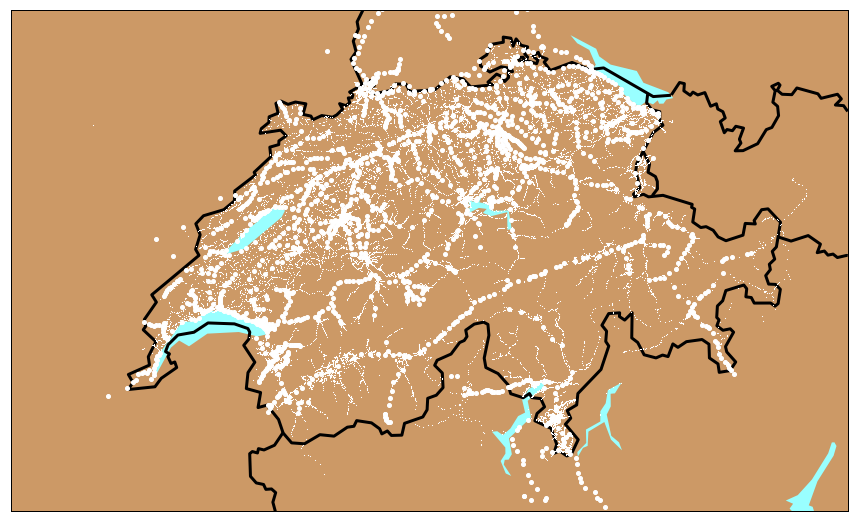

In [6]:
PlotNodes(CFF_Graph,CFF_Graph.nodes())

# Diameter and average shortest path length with the GCC

To deal with the diameter and the average shortest path length, it is necessary to deal with the giant connected component of the graph. 

In [8]:
# Extract the giant connected component to compute the diameter and the average shortest path length
CFF_Graph_GCC = max(nx.connected_component_subgraphs(CFF_Graph), key=len) 
print(nx.info(CFF_Graph_GCC))

Name: 
Type: Graph
Number of nodes: 20417
Number of edges: 25150
Average degree:   2.4636


In [7]:
print('The diameter of the GCC is ', nx.diameter(CFF_Graph_GCC))
print('The average shortest path length of the GCC is ', nx.average_shortest_path_length(CFF_Graph_GCC))

The diameter of the GCC is  229
The average shortest path length of the GCC is  69.67942039212369


Compare to the network we had with trains only, we have now a diameter of 229 (compared to 58 before) and an average shortest path length of 70 (compare to 14) before. Therefore we can see that the bus network add, as expected, a lot of new path not connected to the main train routes and increase therefore the diameter and the average shortest path length.

# Community Detection with the GCC

In this part, we will look at the different communities in the network. For this purpose, we will use the GCC in order to avoid single node community and to have a better understanding of what is going on in the network. 

In [9]:
# Install and import the Louvain algorithm
!pip install python-louvain
import community as community 

In [10]:
# Create the best partition 
partition = community.best_partition(CFF_Graph_GCC)

In [11]:
# Give the number of communities
size = int(len(set(partition.values())))
print('The number of communities: ', size)

The number of communities:  113


This number of communities is coherent also with the size of the country. As we know that there are 26 "cantons" in Switzerland, we can see that there is almost 4 communities per canton which is reasonable (4 hubs per canton on average).

Let's now plot the graph for each community.

In [21]:
# Function to plot each community 
List_name_com = []
def plot_community(G,number):
    # Get the list of nodes in community numbered "number"
    c = [nodes for nodes in partition.keys() if partition[nodes] == number]
    # Extract the graph
    T = G.subgraph(c)
    # Name the community
    degree = nx.degree(T)
    degree_sorted = sorted(degree, key=degree.__getitem__, reverse=True)
    if ((len(degree_sorted))!=0):
        title_com = degree_sorted[0]
        List_name_com.append(title_com)
        # Plot the subgraph
        nx.draw_networkx(T,pos=nx.spring_layout(T), with_labels=False, size = 15)
        plt.title(title_com)
        plt.show() 

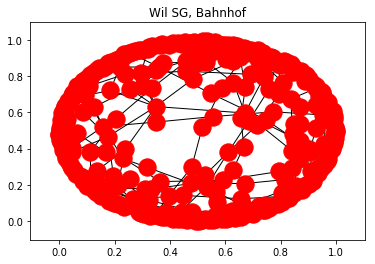

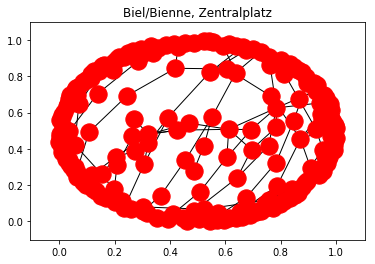

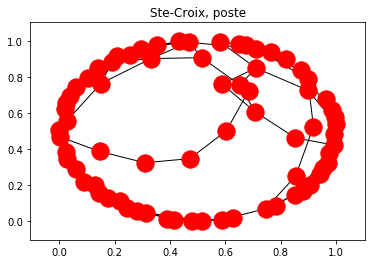

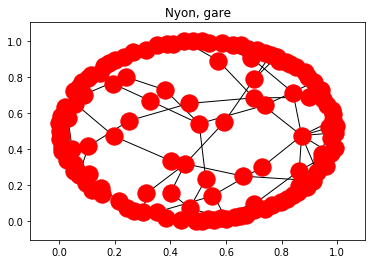

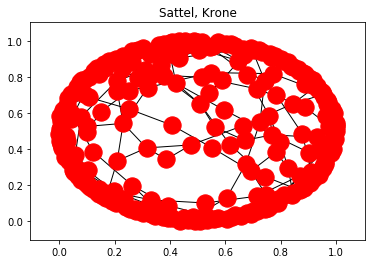

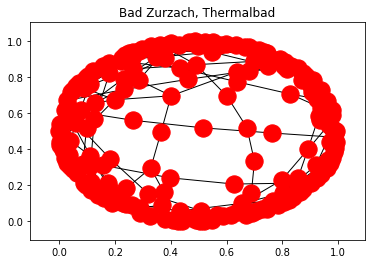

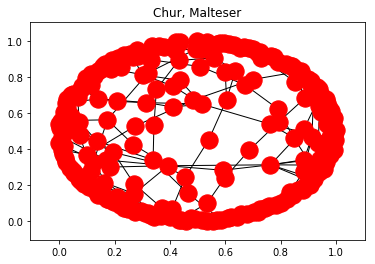

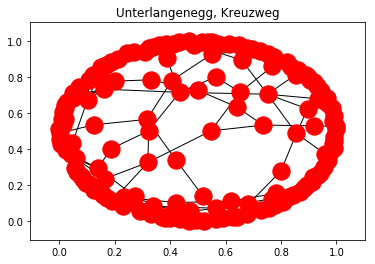

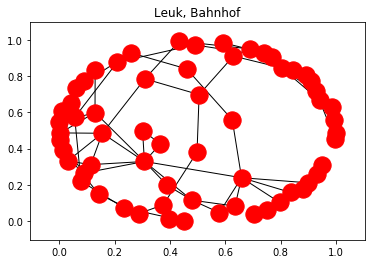

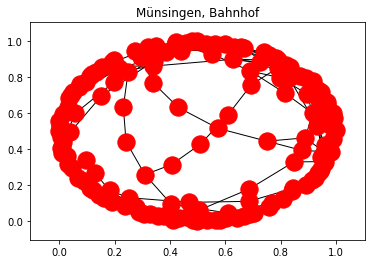

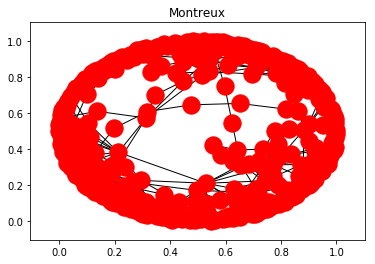

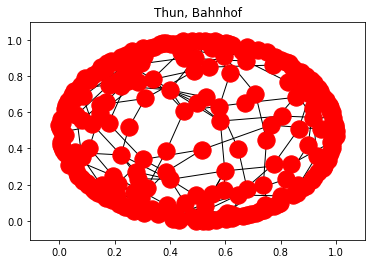

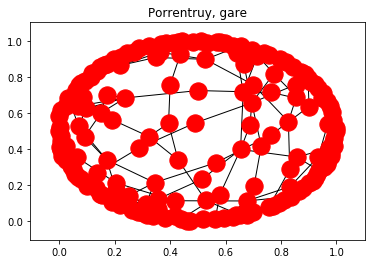

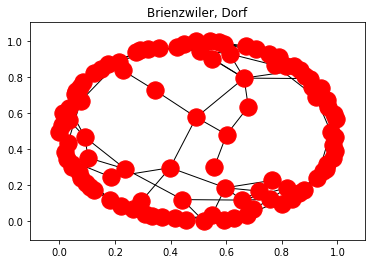

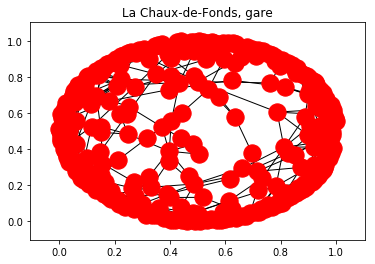

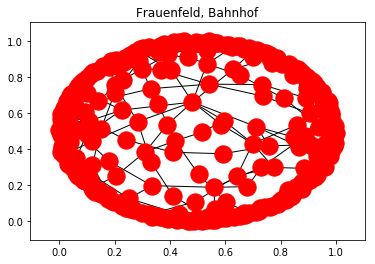

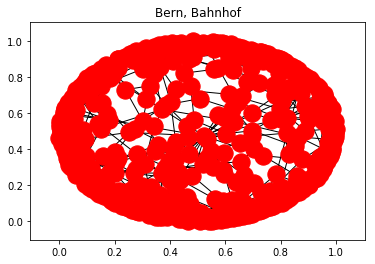

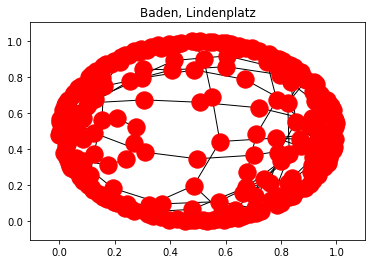

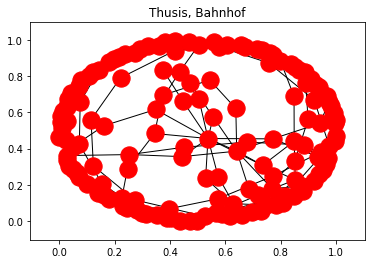

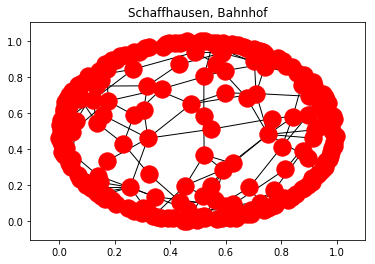

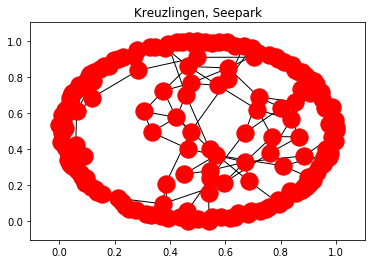

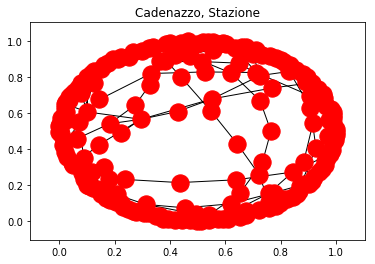

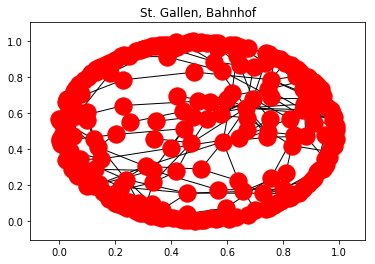

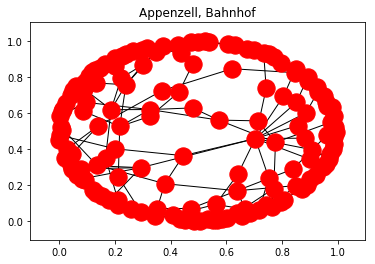

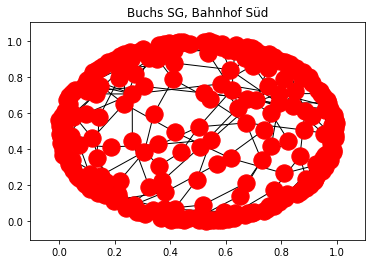

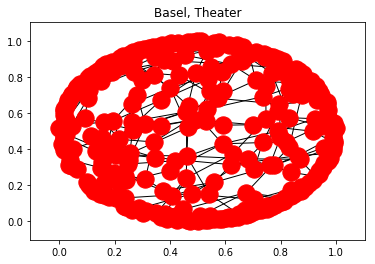

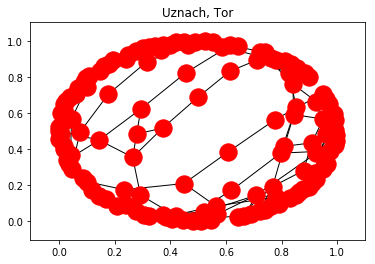

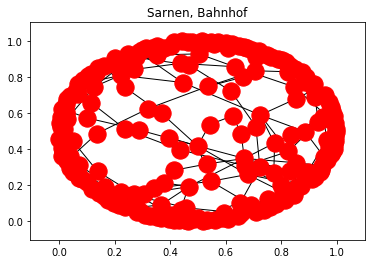

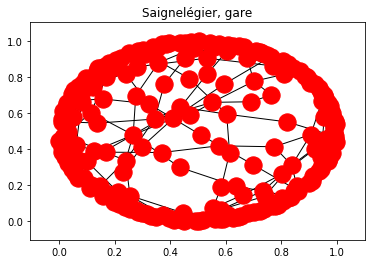

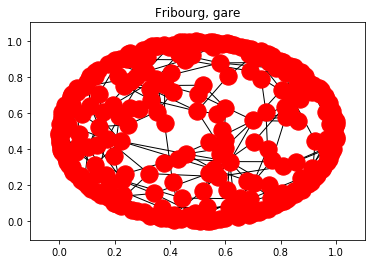

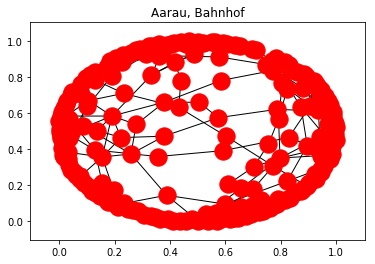

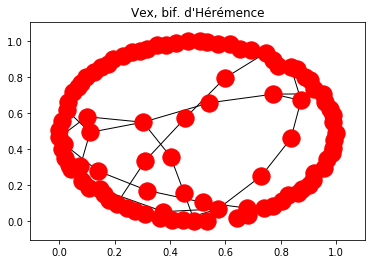

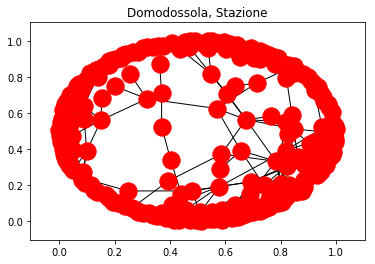

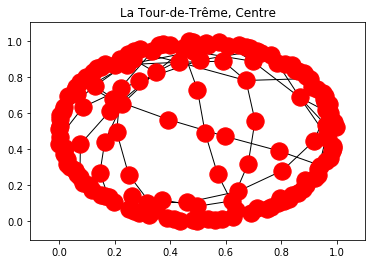

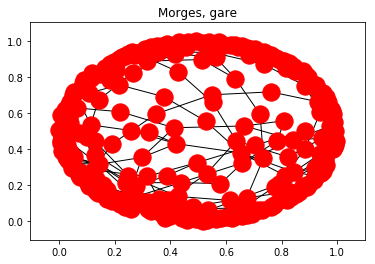

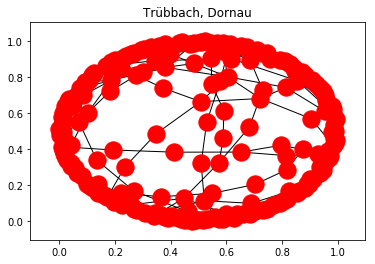

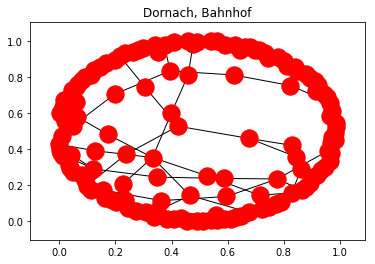

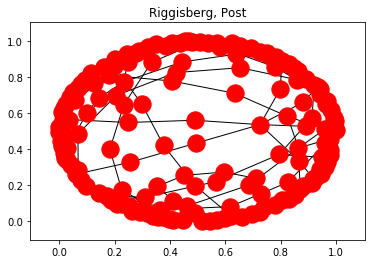

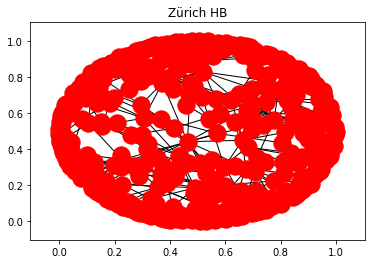

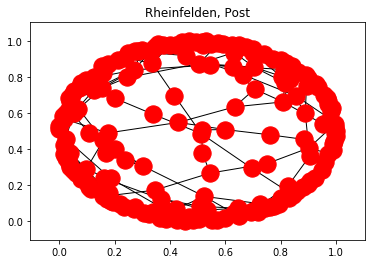

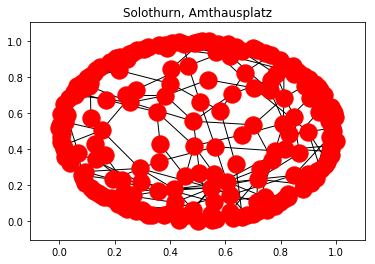

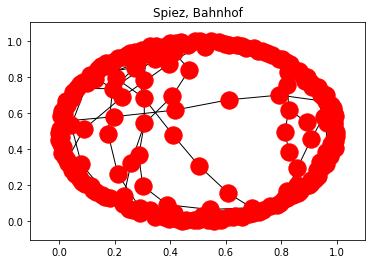

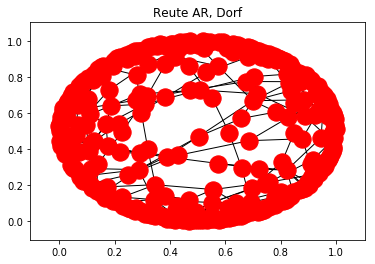

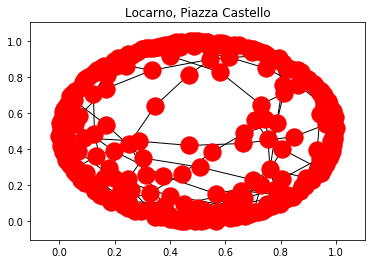

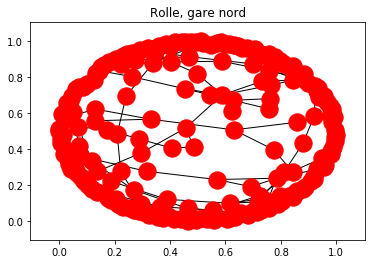

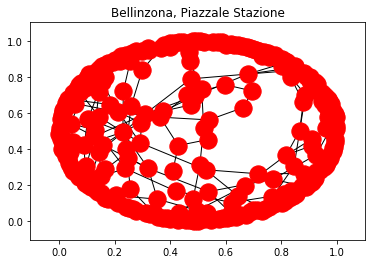

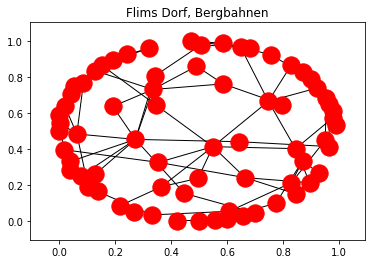

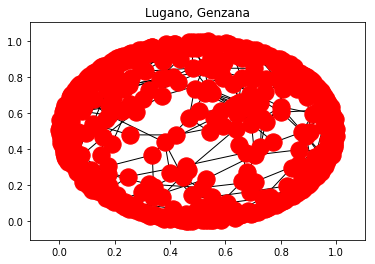

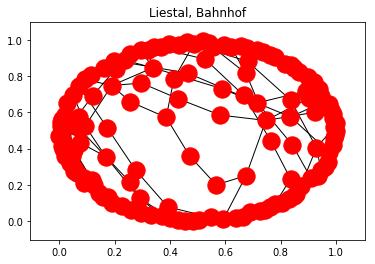

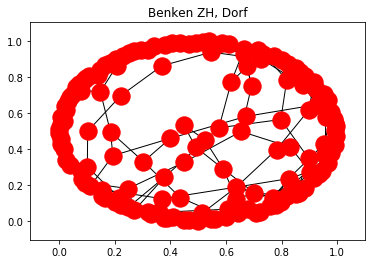

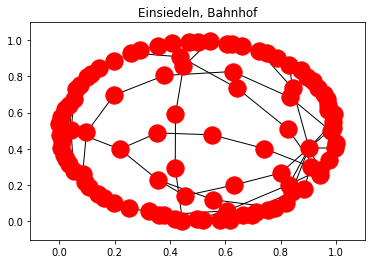

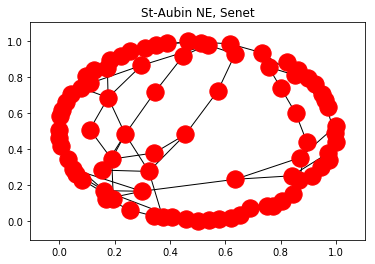

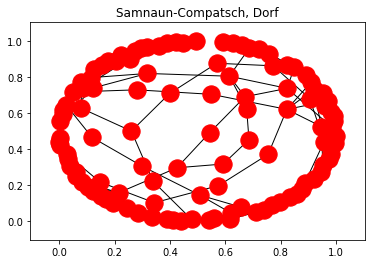

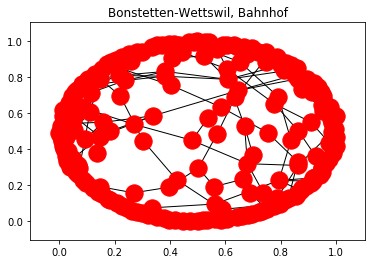

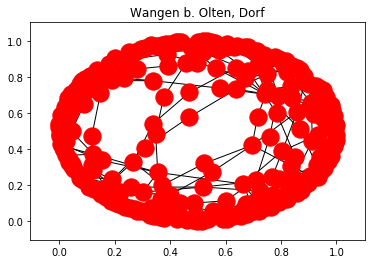

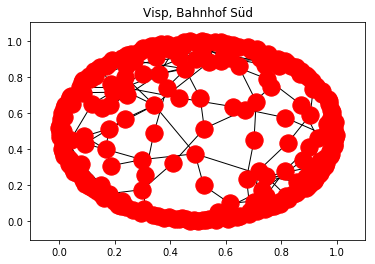

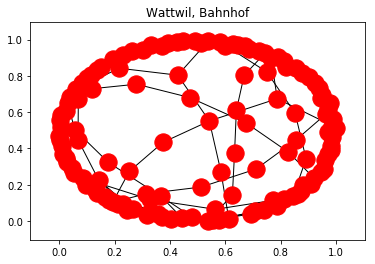

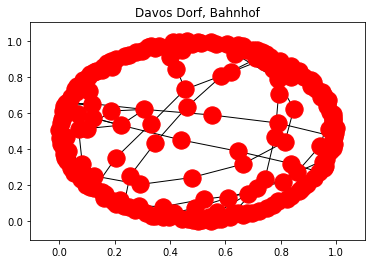

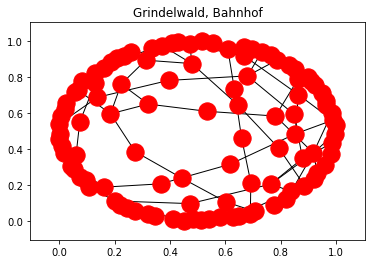

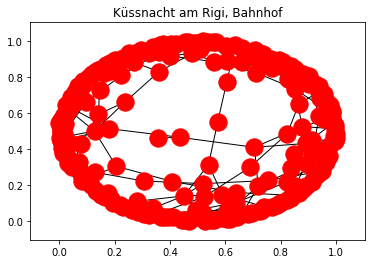

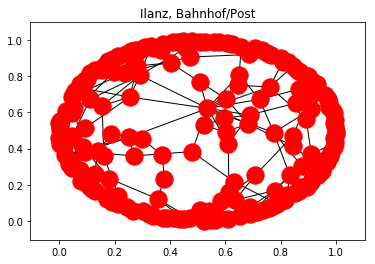

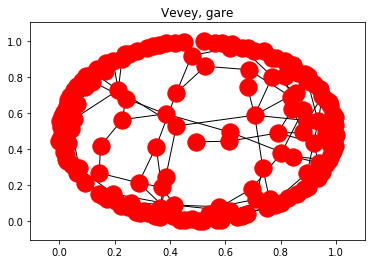

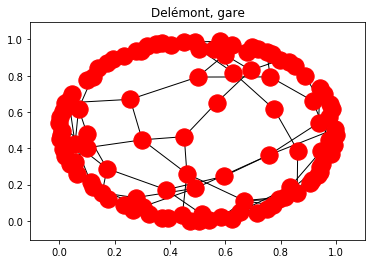

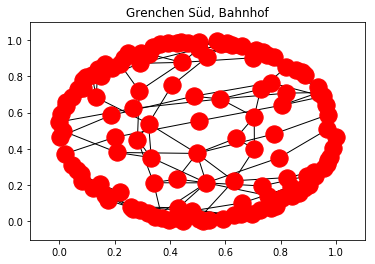

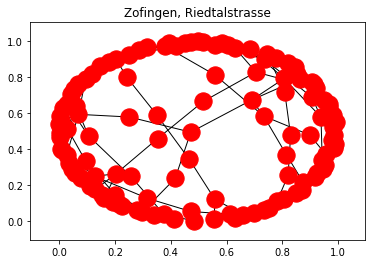

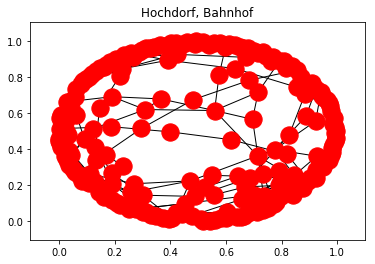

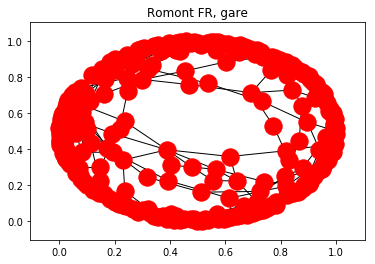

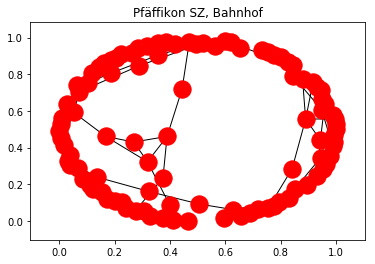

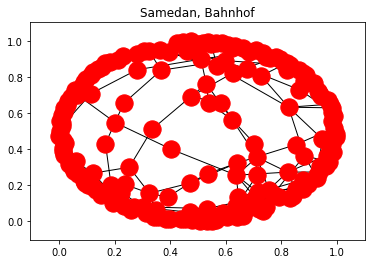

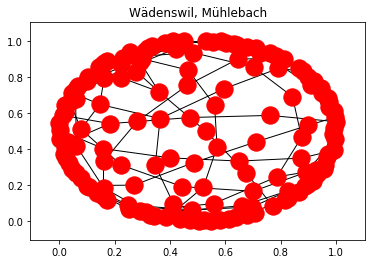

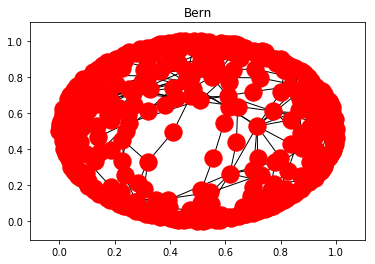

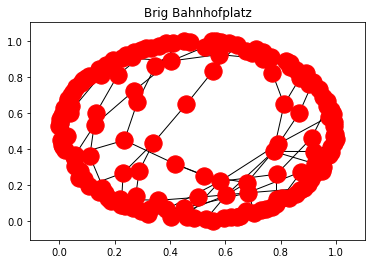

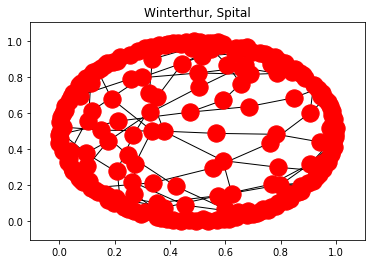

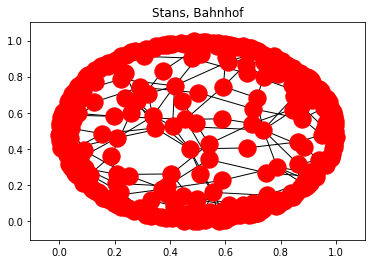

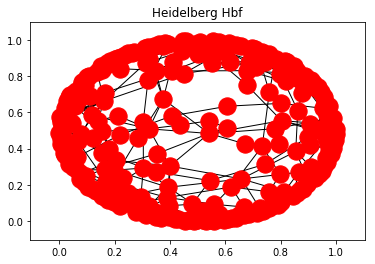

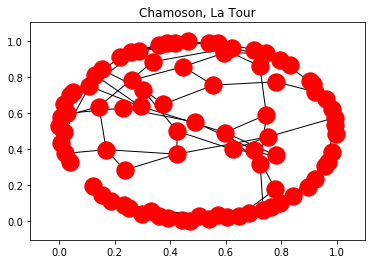

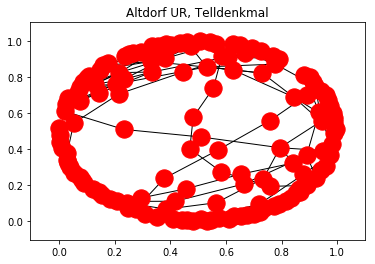

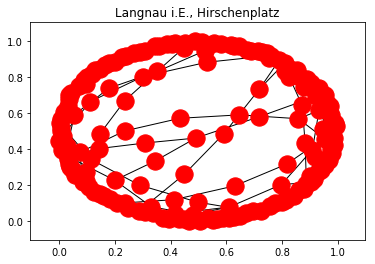

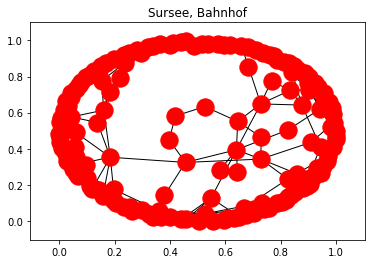

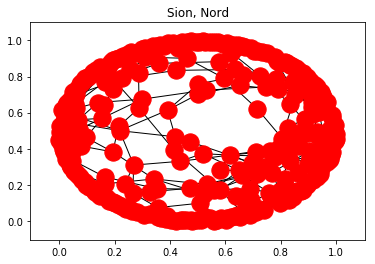

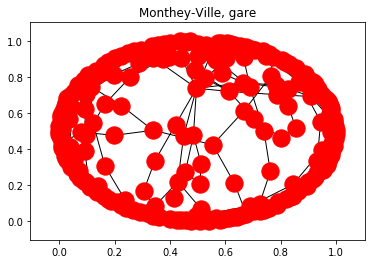

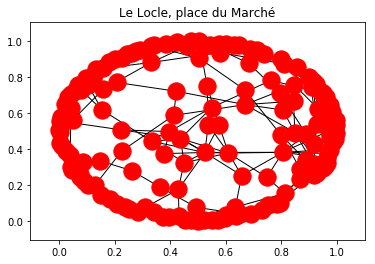

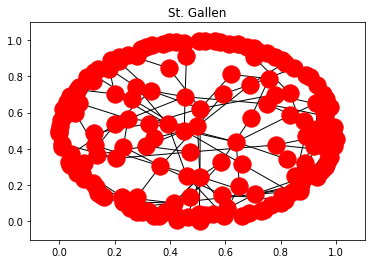

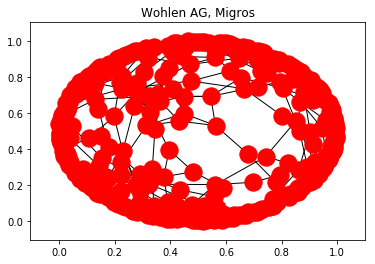

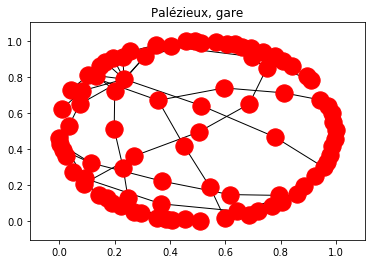

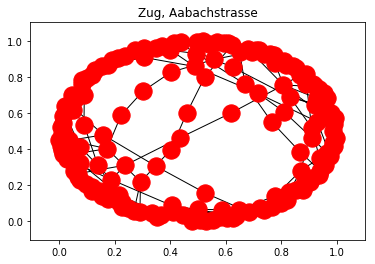

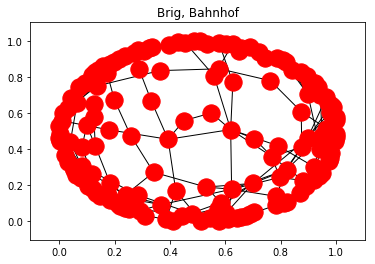

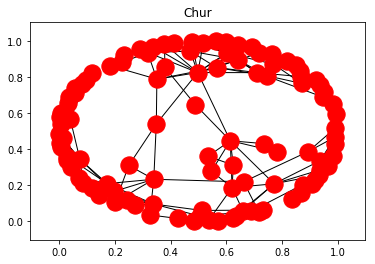

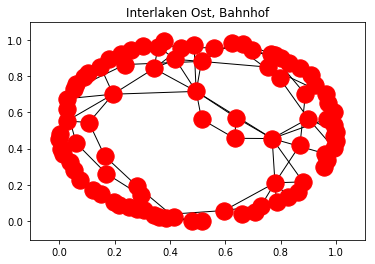

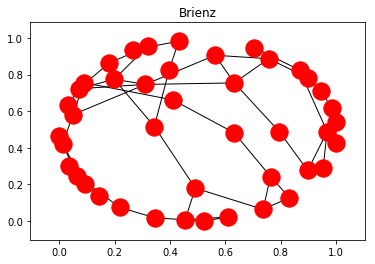

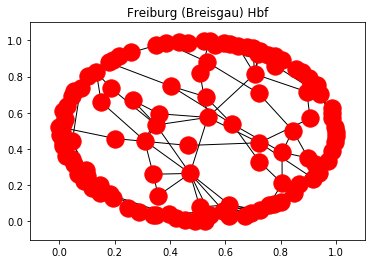

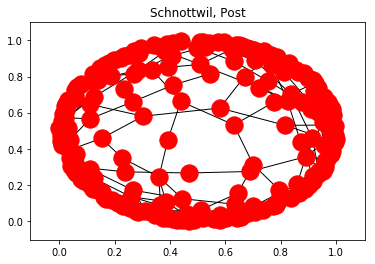

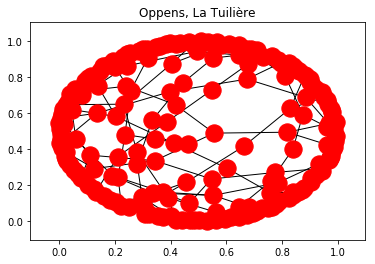

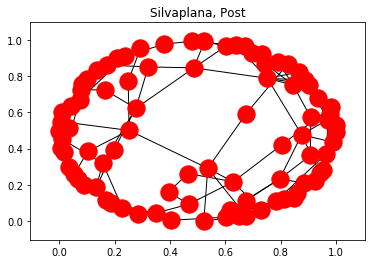

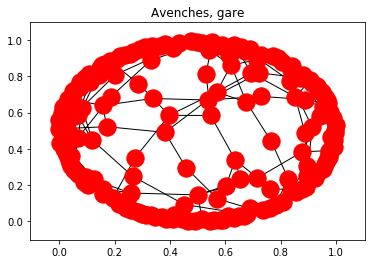

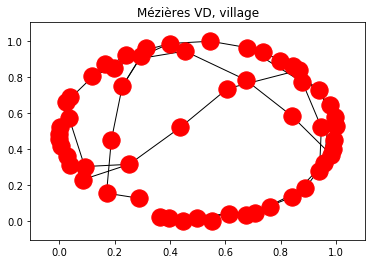

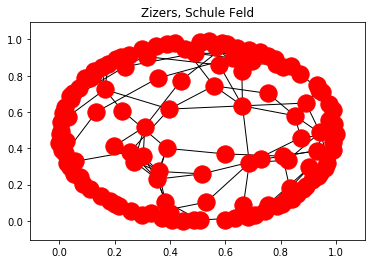

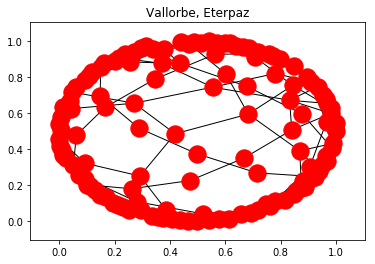

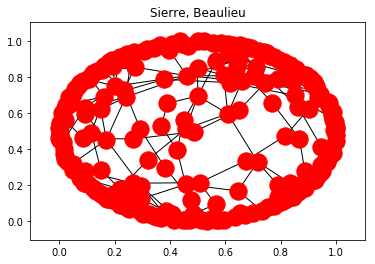

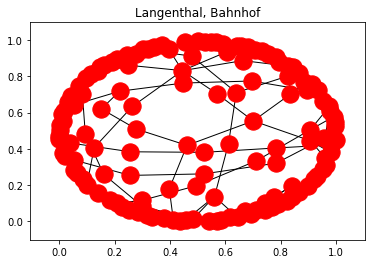

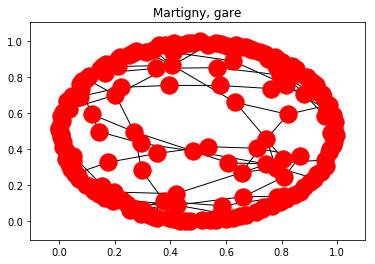

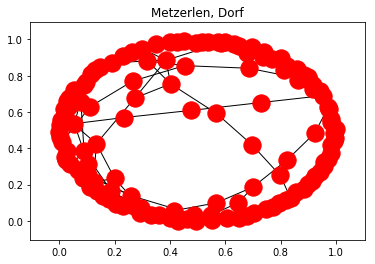

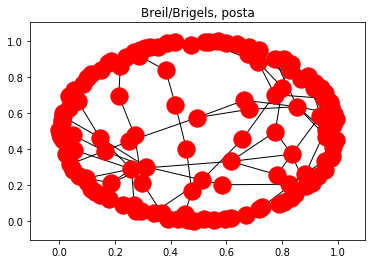

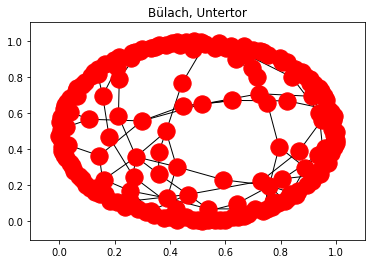

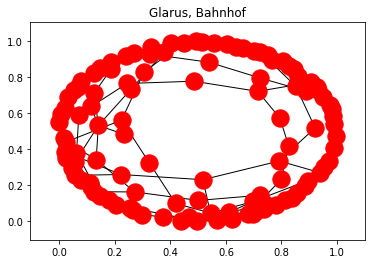

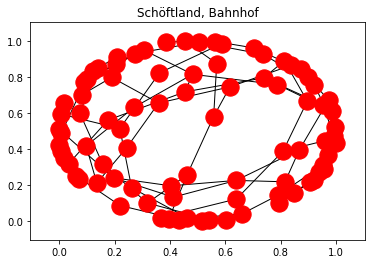

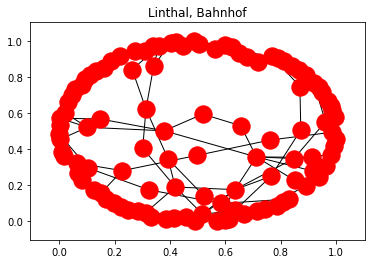

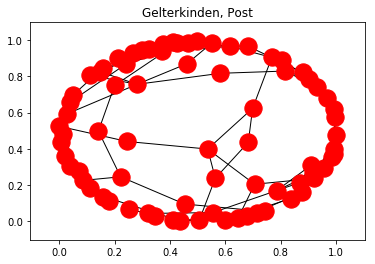

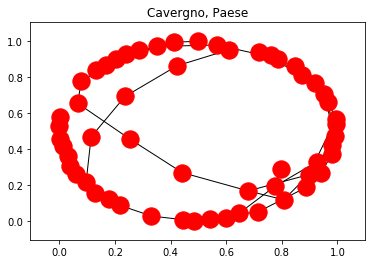

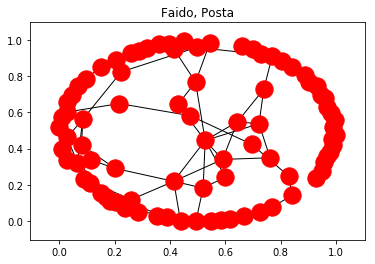

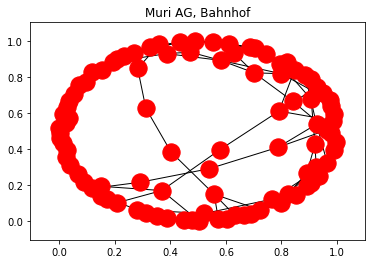

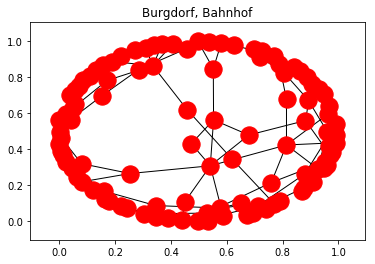

In [22]:
# Display the 40 communities with title corresponding to the highest degree node
for i in range(size):
    plot_community(CFF_Graph,i+1)

As expected, most of the communities are associated with one big city/hubs in the different canton. Some of the communities correspond to smaller et more local region but overall the results are consistent. However we can notice that the community are way more dense than the previous ones with only the trains. This is totally consistent as we added a lot of local busses lines. Moreover, new small communities appear due to busses.

Let's plot the community nodes on the map to see where they are! 

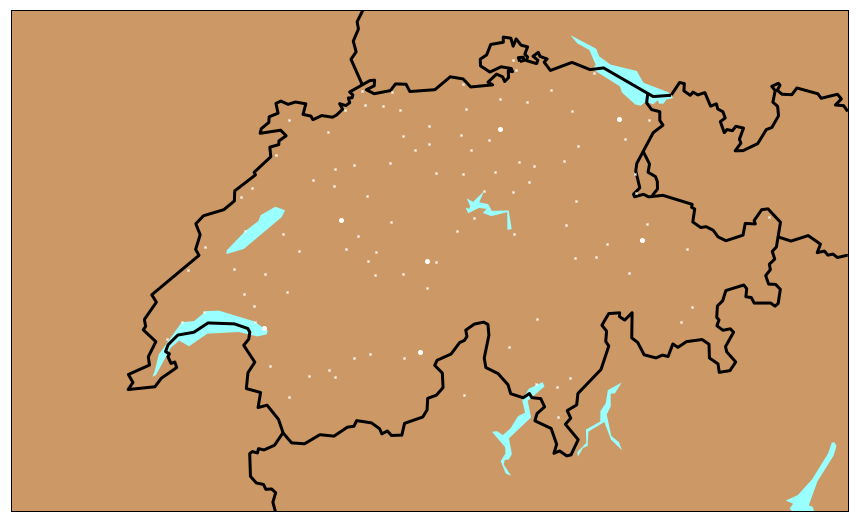

In [26]:
PlotNodes(CFF_Graph, List_name_com)

# Degree Distribution

In this section we will look at the degree distribution for our network. As there are a lot of bus lines we expect to have a distribution with high peak close to 1-2. Moreover, the tail should not change as we add only busses.

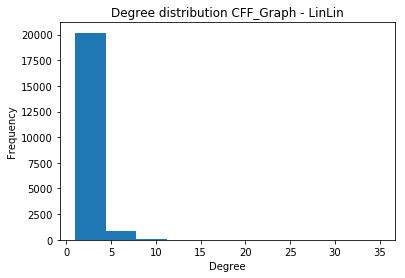

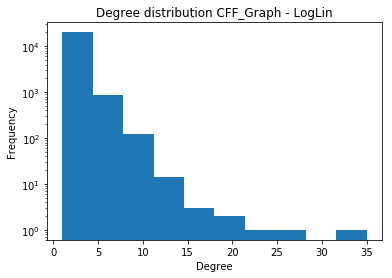

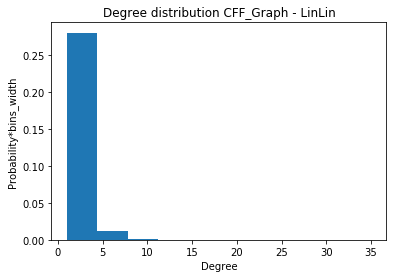

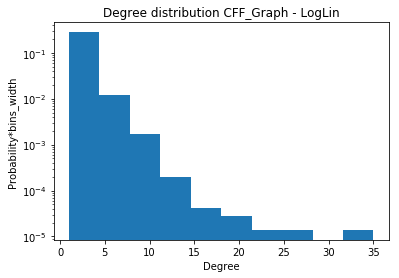

In [27]:
Degree_List = list(nx.degree(CFF_Graph).values())

plt.hist(Degree_List) # Plot the Frequency distribution linlin  
plt.xlabel('Degree')  
plt.ylabel('Frequency')
plt.title('Degree distribution CFF_Graph - LinLin')  
plt.show()

plt.hist(Degree_List, log = True)   # Plot the Frequency distribution loglin
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree distribution CFF_Graph - LogLin')
plt.show()

plt.hist(Degree_List, normed=True) # Plot the probability distribution linlin  
plt.xlabel('Degree')  
plt.ylabel('Probability*bins_width')
plt.title('Degree distribution CFF_Graph - LinLin')  
plt.show()

plt.hist(Degree_List, log = True, normed = True)   # Plot the Frequency distribution loglin
plt.xlabel('Degree')
plt.ylabel('Probability*bins_width')
plt.title('Degree distribution CFF_Graph - LogLin')
plt.show()

These graphs show us that the degree distribution seems to be like an decreasing exponential one (like a Poisson law maybe). It is coherent as we consider many small, busses, regional and isolated stops with 1 or 2 connections. As expected, there is a few big hubs connected to more than 20 other stops. 

# Density, local and overall clustering

In [29]:
print('The average clustering coefficient for the network is', nx.average_clustering(CFF_Graph))
print('The overall clustering coefficient for the network is', nx.transitivity(CFF_Graph))
print('The density of the network is', nx.density(CFF_Graph))

The average clustering coefficient for the network is 0.09178284962212373
The overall clustering coefficient for the network is 0.13127465387887693
The density of the network is 0.00011563867290211392


The clustering coefficient and the density of the network are quite low. As expected the network is really sparse as we take into account really small regional stops. We see also that the density is way lower than the one with only the trains. (Previously 0.1% and now 0.01%)

# Centrality Measures

Hereafter are listed all the different centrality measure seen in class. In this part, it should have been interesting to compute the centrality measures weighted by the population. But we didn't succeed to match exactly all the stops with the population and it does not make sense now to use the population as weight. 

### Degree Centrality

In [30]:
# Degree centrality 
Degree_Centrality = nx.degree(CFF_Graph)

In [31]:
# Highest nodes for degree centrality
Degree_Centrality_Sorted = sorted(Degree_Centrality, key=Degree_Centrality.__getitem__, reverse=True)
print('The top 20 nodes for degree centrality are:')
for i in range(20):
    print(Degree_Centrality_Sorted[i])

The top 20 nodes for degree centrality are:
Bern, Bahnhof
Bern
Zürich HB
Luzern
Olten
Winterthur
St. Gallen, Bahnhof
Ilanz, Bahnhof/Post
Lausanne
Montreux
Chur
Domodossola, Stazione
Arth-Goldau
Fribourg, gare
Basel SBB
Zug
Appenzell, Bahnhof
Biel/Bienne
Saignelégier, gare
Thusis, Bahnhof


The results are consistent as we obtain all the big cities. It is almost the same as the previous one with only trains.

### Closeness Centrality

In [32]:
# Closeness Centrality
Close_Centrality = nx.closeness_centrality(CFF_Graph)

In [35]:
# Highest nodes for closeness
Close_Centrality_Sorted = sorted(Close_Centrality, key=Close_Centrality.__getitem__, reverse=True)
print('The top 20 nodes for closeness centrality are:')
for i in range(20):
    pThe results are consistent as we obtain all the big cities. It is almost the same as the previous one with only trains.rint(Close_Centrality_Sorted[i])

The top 20 nodes for closeness centrality are:
Zürich HB
Bern
Olten
Sargans
Zug
Rotkreuz
Aarau
Winterthur
Bern Felsenau
Luzern
Lenzburg
Thalwil
Baar
Zürich Stadelhofen
Zürich Flughafen
Basel SBB
Thun
Zofingen
Fribourg/Freiburg
Liestal


The results are consistent as we obtain all the big cities. It is almost the same as the previous one with only trains. However, we can notice that some city like Zürich or Bern give few stops for this measure.

### Betweenness Centrality

In [44]:
# Betweenness centrality
Between_Centrality = nx.betweenness_centrality(CFF_Graph)

In [45]:
# Highest nodes for betweenness
Between_Centrality_Sorted = sorted(Between_Centrality, key=Between_Centrality.__getitem__, reverse=True)
print('The top 20 nodes for betweenness centrality are:')
for i in range(20):
    print(Between_Centrality_Sorted[i])

The top 20 nodes for betweenness centrality are:
Zürich HB
Bern
Bern, Bahnhof
Bern Felsenau
Winterthur
Disentis/Mustér
Mumpé Tujetsch
Segnas, casa da scola
Disentis/Mustér, staziun/posta
Acla da Fontauna, center sport
Acla da Fontauna
Segnas
Disentis/Mustér, Vitg Dorfzen
Rabius-Surrein, staziun
Trun, Campliun
Trun, casa da scola
Rueun, S. Clau
Ilanz, Bahnhof/Post
Chur, Malteser
Laax GR, Bergbahnen


With this measure we can see, as expected, that Zürich and Bern are the big hubs that make connections between communities but the rest of the list is quite unexpected as it seems to be mainly small stops.

### Page Rank

In [37]:
# Page rank 
Page_Rank = nx.pagerank(CFF_Graph)

In [38]:
# Highest nodes for Page rank measure
Page_Rank_Sorted = sorted(Page_Rank, key=Page_Rank.__getitem__, reverse=True)
print('The top 20 nodes for page rank are:')
for i in range(20):
    print(Page_Rank_Sorted[i])

The top 20 nodes for page rank are:
Bern, Bahnhof
Bern
Zürich HB
Luzern
Olten
Appenzell, Bahnhof
Winterthur
Ilanz, Bahnhof/Post
St. Gallen, Bahnhof
Lausanne
Biel/Bienne
Domodossola, Stazione
Montreux
Monthey-Ville, gare
Laax GR, Bergbahnen
Thun, Bahnhof
Thusis, Bahnhof
Chur
Morges, gare
Saignelégier, gare


The results are consistent as we obtain all the big cities. It is almost the same as the previous one with only trains.

### EigenVector Centrality

In [39]:
# EigenVector centrality 
EigenVector_Centrality = nx.eigenvector_centrality(CFF_Graph)

In [40]:
# Highest nodes for EigenVector Centrality 
EigenVector_Centrality_Sorted = sorted(EigenVector_Centrality, key=EigenVector_Centrality.__getitem__, reverse=True)
print('The top 20 nodes for eigenvector centrality are:')
for i in range(20):
    print(EigenVector_Centrality_Sorted[i])

The top 20 nodes for eigenvector centrality are:
Zürich HB
Bern
Olten
Luzern
Zug
Aarau
Basel SBB
Liestal
Zollikofen
Rotkreuz
Thalwil
Winterthur
Lenzburg
Baar
Zofingen
Zürich Oerlikon
Sissach
Arth-Goldau
Zürich Enge
Zürich Flughafen


Again, as we could expect, the centrality measures return all the big hubs in Switzerland like Zurich, Bern, Otlen, Bale, Luzern,..
It therefore shows that these cities are the most "important" ones in the railway network of Switzerland. Moreover, some of them present few stops in the list.

# Ties strength analysis (Neighborhood overlap)

Let's report the code generated in Assignment 2 to calculate the neighborhood overlap

In [41]:
neigh_overlap = dict()  # Create the dictionnary of the neighbourhood overlap

for e in CFF_Graph.edges():
    source = e[0]
    sink = e[1]
    neigh_source = list(nx.all_neighbors(CFF_Graph,source)) # list of neighbors of the source vertex
    neigh_sink = list(nx.all_neighbors(CFF_Graph,sink)) # list of neighbors of the sink vertex
    
    neigh_source.remove(sink) # The sink node is not included in the number of neighbors according to Easley and Kleinberg
    neigh_sink.remove(source) # The source node is not included in the number of neighbors according to Easley and Kleinberg
    
    common_neighbors = len(list(nx.common_neighbors(CFF_Graph,source,sink))) # number of common neighbors
    at_least_one = len(neigh_source) + len(neigh_sink) - common_neighbors # number of neighbors of at least one node 
    if (at_least_one == 0):
        print('The nodes', source, 'and', sink, 'are isolated.')
    else:
        ratio = common_neighbors/at_least_one
        neigh_overlap[e] = ratio
    

The nodes Guarda, staziun and Guarda, cumün are isolated.
The nodes Bettmeralp and Riederalp West are isolated.
The nodes Isérables and Riddes TRI are isolated.
The nodes Oberems, Seilbahn and Gruben VS are isolated.
The nodes München ZOB (Hackerbrücke) and Zürich, Sihlquai/HB are isolated.
The nodes Les Montuires and Pied du barrage are isolated.


Let's now look at the neighborhood overlap distribution 

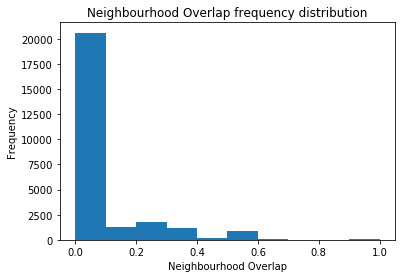

In [42]:
list_overlap = list(neigh_overlap.values()) # List of the overlap coefficients
plt.hist(list_overlap)    
plt.xlabel('Neighbourhood Overlap')
plt.ylabel('Frequency')
plt.title('Neighbourhood Overlap frequency distribution')
plt.show()

As expected there is a lot of zeros as many stops are not hubs but small stops with just two neighbors (the previous and the next one of a line)

Let's look at the lowest and highest links to confirm

In [43]:
sorted_overlap = sorted(neigh_overlap, key=neigh_overlap.__getitem__)

# Print the 20 links with lowest overlap
print('The 20 lowest links for the neighborhood overlap are:')
for i in range(20):
    print(sorted_overlap[i])
    
# Print the 20 links with highest overlap
print('\n The 20 highest links for the neighborhood overlap are:')
for i in range(20):
    print(sorted_overlap[-i-1])

The 20 lowest links for the neighborhood overlap are:
('Basel SBB', 'Basel Dreispitz')
('Basel SBB', 'Laufen')
('Basel SBB', 'Basel Bad Bf')
('Basel SBB', 'Mulhouse Ville')
('Pratteln', 'Frenkendorf-Füllinsdorf')
('Liestal', 'Frenkendorf-Füllinsdorf')
('Liestal', 'Altmarkt')
('Basel Dreispitz', 'Münchenstein')
('Olten', 'Trimbach')
('Olten', 'Luzern')
('Olten', 'Langenthal')
('Olten', 'Olten Hammer')
('Zürich HB', 'Baden')
('Zürich HB', 'Sargans')
('Zürich HB', 'Schaffhausen')
('Laufen', 'Zwingen')
('Laufen', 'Delémont')
('Basel Bad Bf', 'Riehen Niederholz')
('Basel Bad Bf', 'Frankfurt (Main) Hbf')
('Basel Bad Bf', 'Weil am Rhein')

 The 20 highest links for the neighborhood overlap are:
('Köndringen', 'Teningen-Mundingen')
('Haslach', 'Biberach (Baden)')
('Neuchâtel, Nid-du-Crô', 'Neuchâtel, Piscines')
('Rheinfelden (D), Riedmatt', 'Rheinfelden (D),Riedm Storchen')
('Buggingen', 'Heitersheim')
('Freiburg (D) Herdern', 'Gundelfingen (Breisgau)')
('Jungfraujoch', 'Eismeer')
('Etiez', 'L

The analysis of the neighborhood overlap is really strange for this network. Indeed, due to regional trains and busses the results are falsed by all the small connections. It will require to aggregate some of the data to have a better view on the neighborhood overlap.

## Infection model 

In this part we will analyse the spread of an infection accross Switzerland. We are going to use a SIR model. The probability of infection will be define as follow: 
- Probability constant for a bus infection
- Probability proportional to the population of the city for the train station

In [46]:
import ndlib.models.epidemics.SIRNodewiseModel as sir
import ndlib.models.ModelConfig as mc

In [ ]:
# Define the max population corresponding to the population of Zürich
MAX_POPULATION = 390000

In [67]:
# Definition of the modified SIR Model
def sir_nw(network, infected_nodes, nb_iter):
    # Create the SIR model 
    sir_model = sir.SIRNodewiseModel(network)

    # Initialize the parameter for the diffusion model
    sir_cfg = mc.Configuration()
    sir_cfg.add_model_parameter('gamma', 0.005)
    
    for node in network.nodes():
        population = network.node[node]['population']
        if (population != 'None'):
            population = int(population)
        
        node_beta = 0
        if population == 'None':
            node_beta = 0.05  
        elif population == -1:
            node_beta = 0.05
        elif population > 0:
            node_beta = population / MAX_POPULATION
            
        sir_cfg.add_node_configuration('beta', node, node_beta)
    
    sir_cfg.add_model_initial_configuration("Infected", infected_nodes)

    sir_model.set_initial_status(sir_cfg)
    
    # Calculate the nb_ite iterations and the trends
    sir_iter = sir_model.iteration_bunch(nb_iter)
    
    return sir_model, sir_iter

In [72]:
# Run 1000 iterations for Lausanne initially infected
model, iters = sir_nw(CFF_Graph, ['Lausanne'], 1000)
print(iters[-1]['node_count'])

{0: 19304, 1: 61, 2: 1837}


In [70]:
import ndlib.viz.mpl.DiffusionTrend as dt

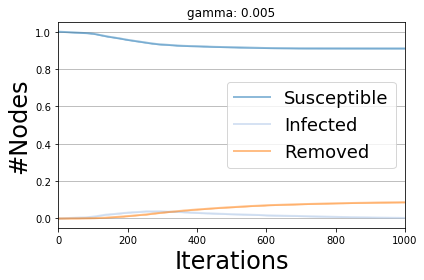

In [73]:
# Simulation execution
trends = model.build_trends(iters)

# Visualization
viz = dt.DiffusionTrend(model, trends)
viz.plot()

In [76]:
# This function plot the state of the cities after running the model
def PlotCityState(SIR_Iteration_Object,Network):
    TrainPointSize = 4
    BusPointSize = 2
    
    NodeState = {}
    for iteration in SIR_Iteration_Object:
        for Node in iteration['status']:
            NodeState[Node] = iteration['status'][Node]
    
    plt.figure(figsize=(15,15))

    map = Basemap(projection='merc', lat_0 = 46.6494, lon_0 = 8.8000,
        resolution = 'i', area_thresh = 100.0,
        llcrnrlon=5.1525, llcrnrlat=45.5525,
        urcrnrlon=10.9533, urcrnrlat=47.9310)

    map.drawcountries(linewidth=3.0)
    map.drawmapboundary(fill_color='#99ffff')
    map.fillcontinents(color='#cc9966',lake_color='#99ffff')

    for node in NodeState:
        lon = float(Network.node[node]['lon'])
        lat = float(Network.node[node]['lat'])
        NodeType = str(Network.node[node]['NodeType'])
        x,y = map(lon, lat)
        
        if NodeType == 'Train':
            if NodeState[node] == 0:
                map.plot(x, y, 'wo', markersize=TrainPointSize)
            elif NodeState[node] == 1:
                map.plot(x, y, 'ro', markersize=TrainPointSize)
            elif NodeState[node] == 2:
                map.plot(x, y, 'ko', markersize=TrainPointSize)
        else:
            if NodeState[node] == 0:
                map.plot(x, y, 'wx', markersize=BusPointSize)
            elif NodeState[node] == 1:
                map.plot(x, y, 'rx', markersize=BusPointSize)
            elif NodeState[node] == 2:
                map.plot(x, y, 'kx', markersize=BusPointSize)                 
    plt.show()

In [81]:
# To show the cities with highest population
dict_pop = dict()
for node in CFF_Graph.nodes():
    pop = CFF_Graph.node[node]['population']
    if pop!='None':
        dict_pop[node] = int(pop)

sorted_pop = sorted(dict_pop, key=dict_pop.__getitem__, reverse = True)

for i in range(10):
    print(sorted_pop[i])

Zürich HB
Zürich Flughafen
Zürich Affoltern
Zürich Leimbach
Basel SBB
Lausanne
Winterthur
Luzern
St. Gallen
Lugano



The infection spreading and diffusion trend after 500 iteration for Zürich HB are:


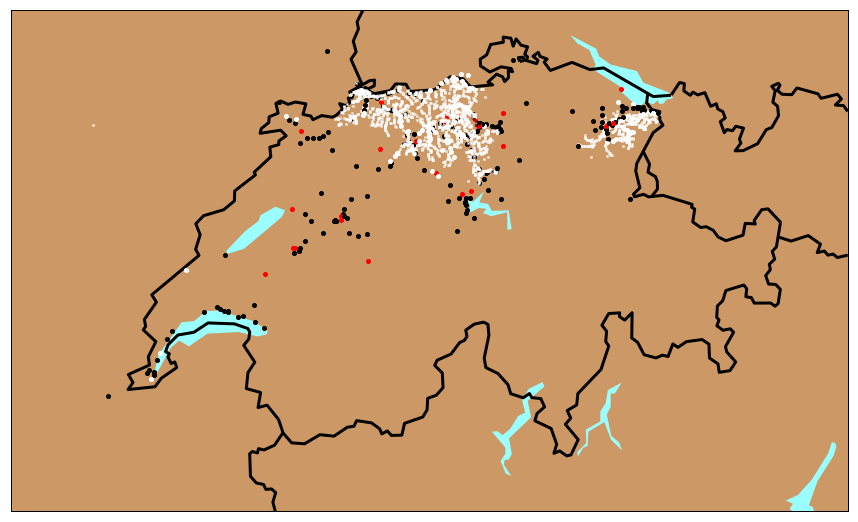

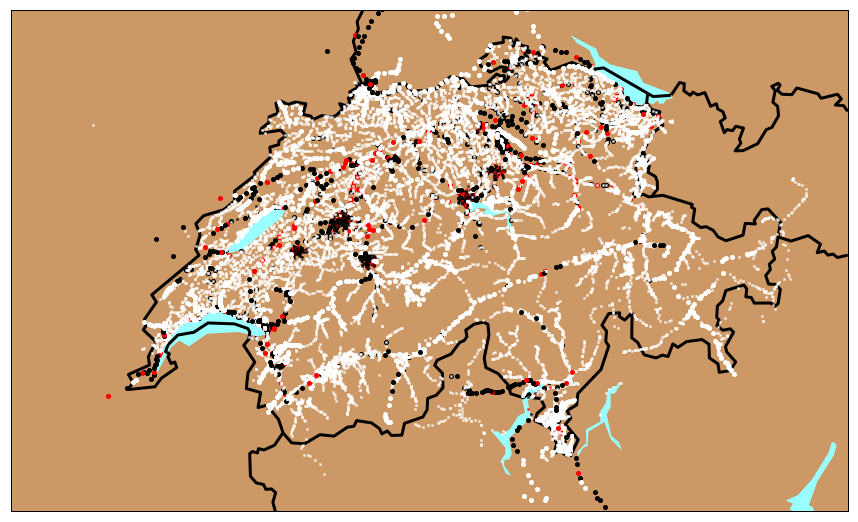

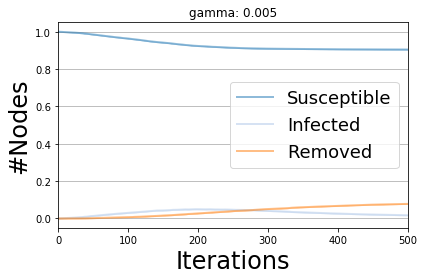


The infection spreading and diffusion trend after 500 iteration for Zürich Flughafen are:


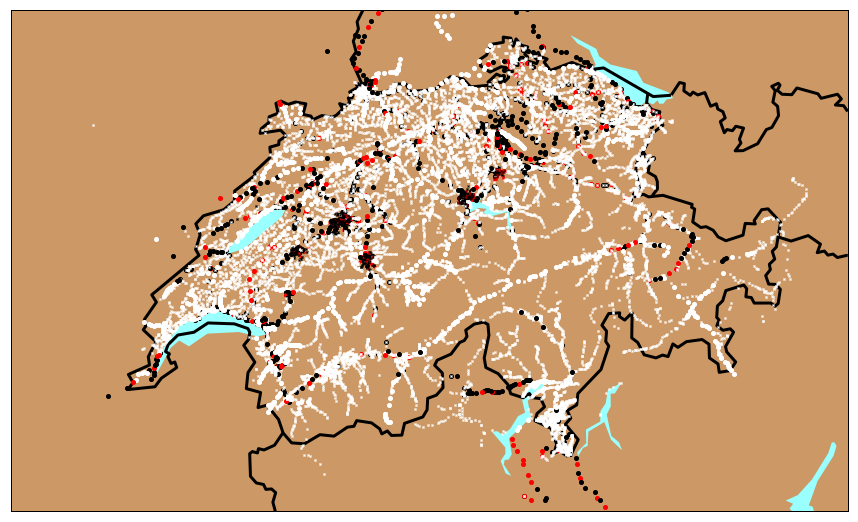

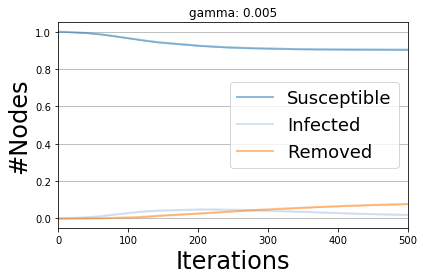


The infection spreading and diffusion trend after 500 iteration for Zürich Affoltern are:


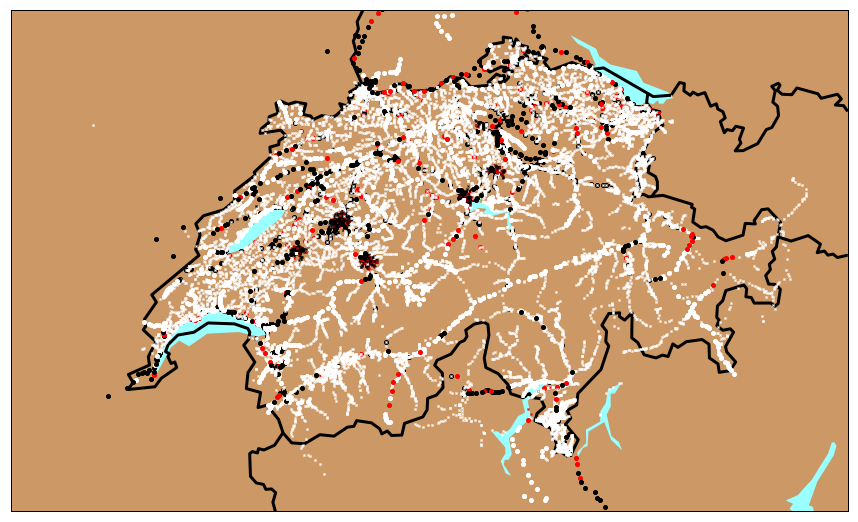

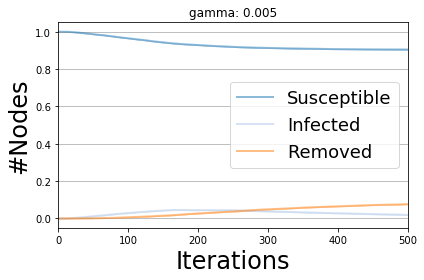


The infection spreading and diffusion trend after 500 iteration for Zürich Leimbach are:


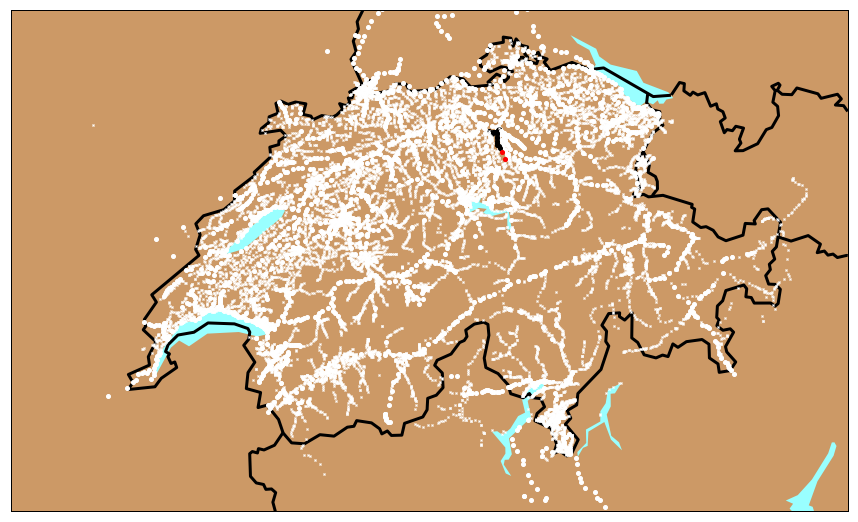

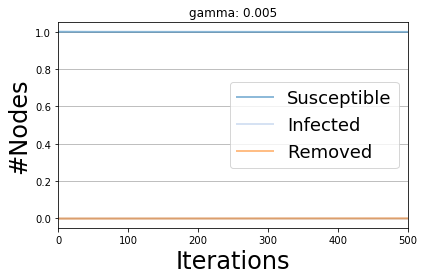


The infection spreading and diffusion trend after 500 iteration for Basel SBB are:


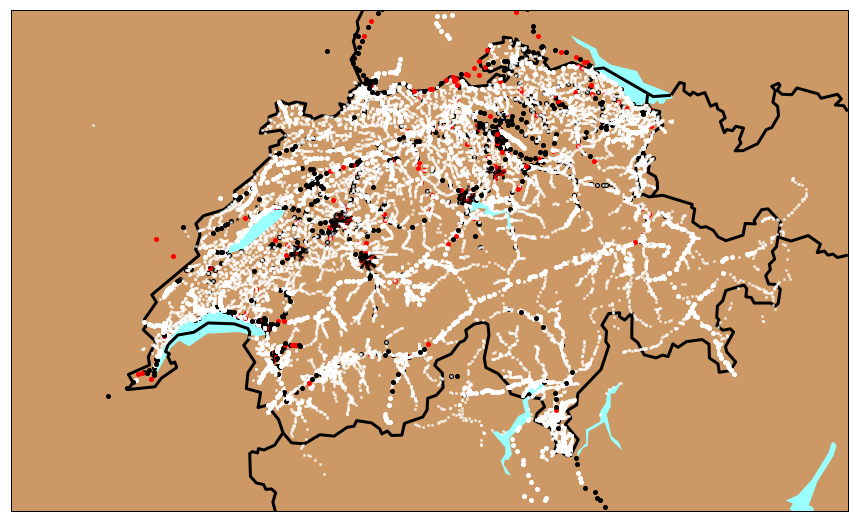

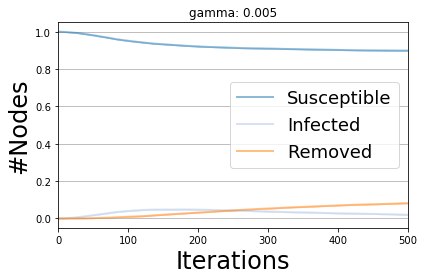


The infection spreading and diffusion trend after 500 iteration for Lausanne are:


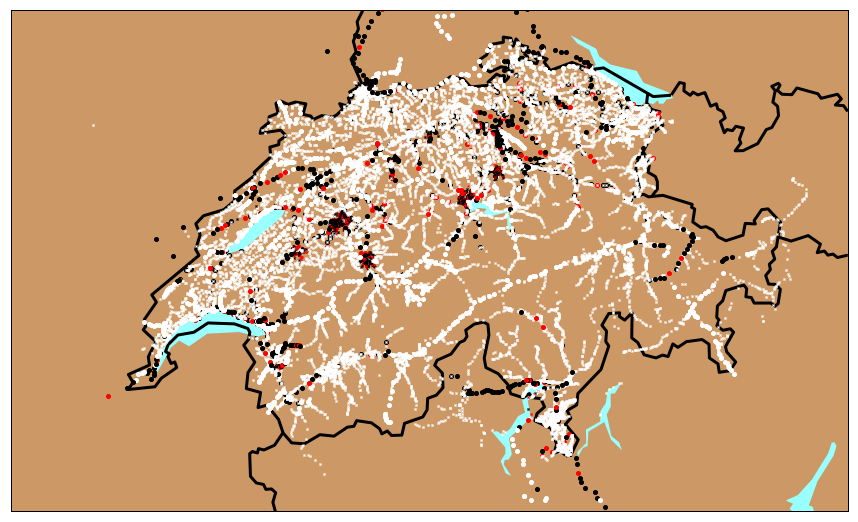

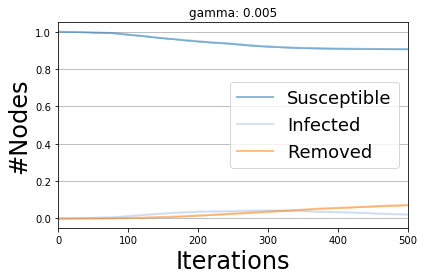


The infection spreading and diffusion trend after 500 iteration for Winterthur are:


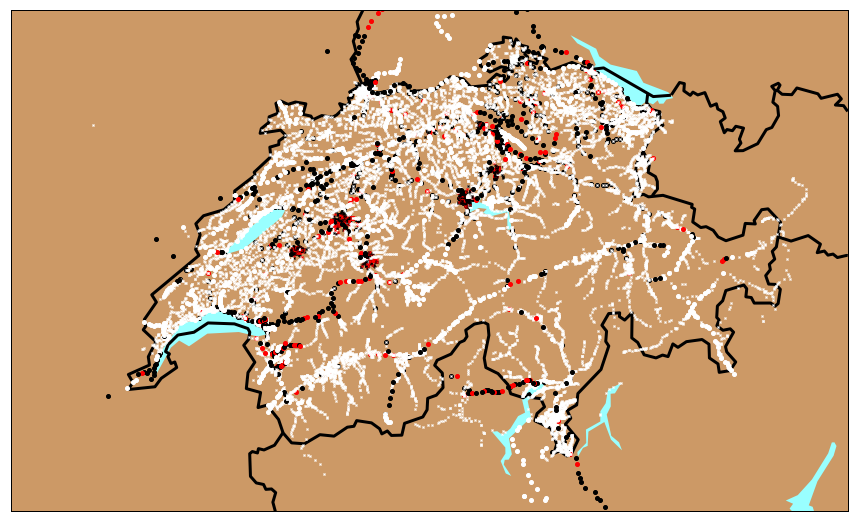

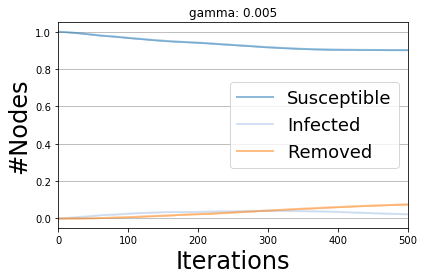


The infection spreading and diffusion trend after 500 iteration for Luzern are:


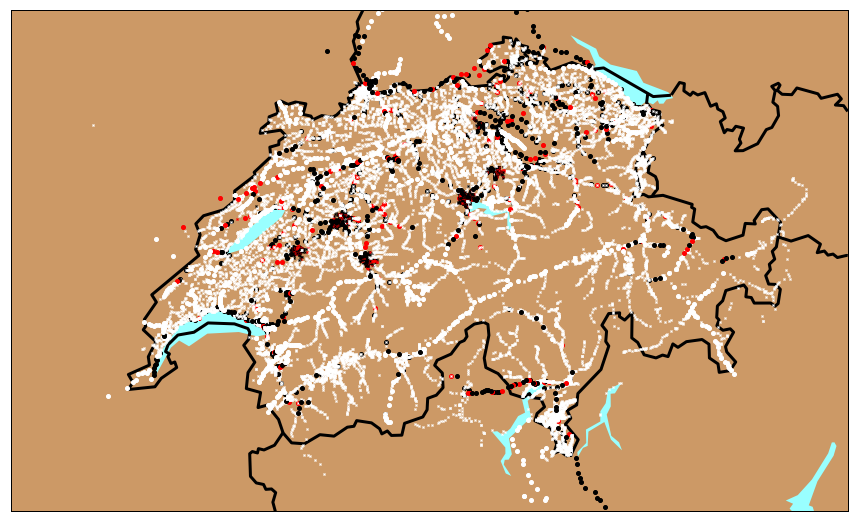

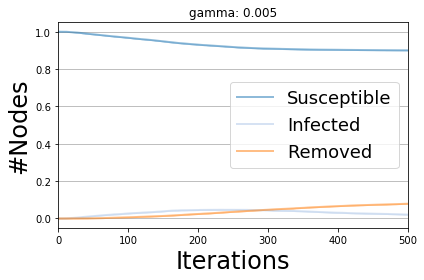


The infection spreading and diffusion trend after 500 iteration for St. Gallen are:


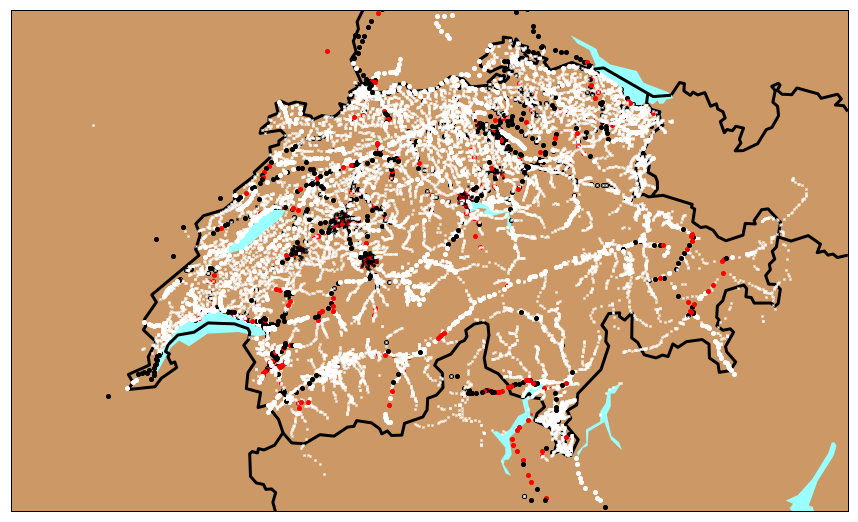

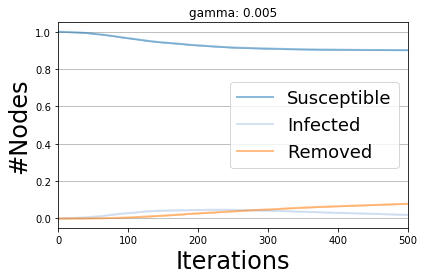


The infection spreading and diffusion trend after 500 iteration for Lugano are:


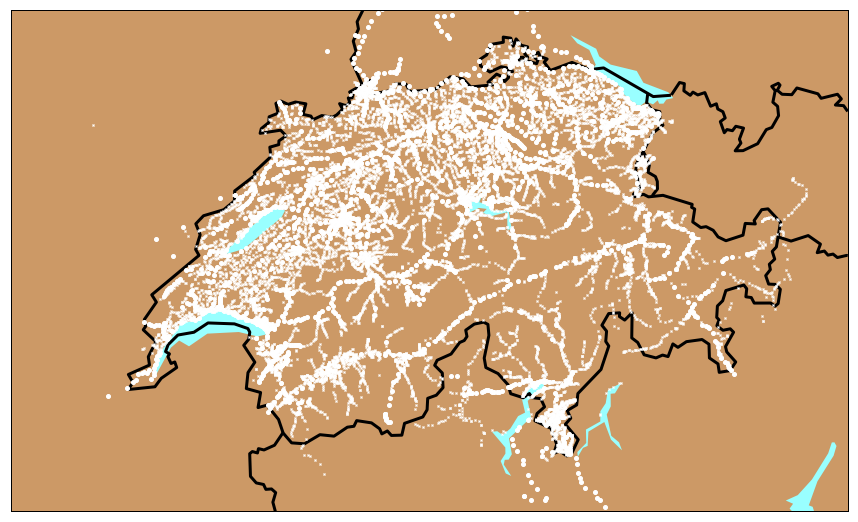

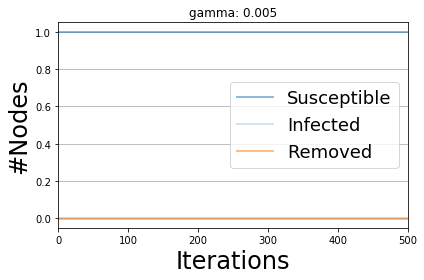

In [83]:
# This cell print the spreading and diffusion trend for the 10 cities with highest population
for i in range(10):
    infected_node = sorted_pop[i]
    
    print('\nThe infection spreading and diffusion trend after 500 iteration for', infected_node,'are:')
    model, iters = sir_nw(CFF_Graph, [infected_node], 500)
    PlotCityState(iters,CFF_Graph)

    # Simulation execution
    trends = model.build_trends(iters)

    # Visualization
    viz = dt.DiffusionTrend(model, trends)
    viz.plot()

In [92]:
# To look at the percentage node infected for big cities
for i in range(10):
    infected_node = sorted_pop[i]
    model, iters = sir_nw(CFF_Graph, [infected_node], 1000)
    print('The percentage of node infected or removed in the network after 1000 iterations starting from', infected_node,'is',round(100*(iters[-1]['node_count'][1]+iters[-1]['node_count'][2])/(iters[-1]['node_count'][0]+iters[-1]['node_count'][1]+iters[-1]['node_count'][2]),2),'%')
    print('The number of node still infected in the newtork after 1000 iterations starting from', infected_node,'is',iters[-1]['node_count'][1],'\n')

The percentage of node infected or removed in the network after 1000 iterations starting from Zürich HB is 10.22 %
The number of node still infected in the newtork after 1000 iterations starting from Zürich HB is 47 

The percentage of node infected or removed in the network after 1000 iterations starting from Zürich Flughafen is 9.97 %
The number of node still infected in the newtork after 1000 iterations starting from Zürich Flughafen is 75 

The percentage of node infected or removed in the network after 1000 iterations starting from Zürich Affoltern is 9.48 %
The number of node still infected in the newtork after 1000 iterations starting from Zürich Affoltern is 54 

The percentage of node infected or removed in the network after 1000 iterations starting from Zürich Leimbach is 9.43 %
The number of node still infected in the newtork after 1000 iterations starting from Zürich Leimbach is 52 

The percentage of node infected or removed in the network after 1000 iterations starting fr

In [95]:
# To look at the percentage node infected for smallest stops
for i in range(5):
    infected_node = sorted_pop[-i-1]
    model, iters = sir_nw(CFF_Graph, [infected_node], 1000)
    print('The percentage of node infected or removed in the network after 1000 iterations starting from', infected_node,'is',round(100*(iters[-1]['node_count'][1]+iters[-1]['node_count'][2])/(iters[-1]['node_count'][0]+iters[-1]['node_count'][1]+iters[-1]['node_count'][2]),2),'%')
    print('The number of node still infected in the newtork after 1000 iterations starting from', infected_node,'is',iters[-1]['node_count'][1],'\n')

The percentage of node infected or removed in the network after 1000 iterations starting from Bad Wildbad Bf is 0.01 %
The number of node still infected in the newtork after 1000 iterations starting from Bad Wildbad Bf is 0 

The percentage of node infected or removed in the network after 1000 iterations starting from Bad Wimpfen-Hohenstadt is 0.18 %
The number of node still infected in the newtork after 1000 iterations starting from Bad Wimpfen-Hohenstadt is 0 

The percentage of node infected or removed in the network after 1000 iterations starting from Babstadt is 0.22 %
The number of node still infected in the newtork after 1000 iterations starting from Babstadt is 1 

The percentage of node infected or removed in the network after 1000 iterations starting from Grombach is 0.17 %
The number of node still infected in the newtork after 1000 iterations starting from Grombach is 0 

The percentage of node infected or removed in the network after 1000 iterations starting from Bad Rappen

## Analysis on trains only

In this final part, we will run our model on the railway network only. This is done due to computation time and also to understand if busses have a large influence on the network or not.

In [97]:
CFF_Graph_Trains = nx.read_gml('CFF_Graph.gml')
print(nx.info(CFF_Graph_Trains))

Name: 
Type: Graph
Number of nodes: 2269
Number of edges: 2996
Average degree:   2.6408


In [98]:
# To add the attributes in the network
for node in CFF_Graph_Trains.nodes():
    if (node not in CFF_Graph.nodes()):
        CFF_Graph_Trains.remove_node(node)
    else:
        CFF_Graph_Trains.node[node]['lon'] = CFF_Graph.node[node]['lon']
        CFF_Graph_Trains.node[node]['lat'] = CFF_Graph.node[node]['lat']
        CFF_Graph_Trains.node[node]['population'] = CFF_Graph.node[node]['population']

In [99]:
def PlotCityStateTrains(SIR_Iteration_Object,Network):
    TrainPointSize = 4
    
    NodeState = {}
    for iteration in SIR_Iteration_Object:
        for Node in iteration['status']:
            NodeState[Node] = iteration['status'][Node]
    
    plt.figure(figsize=(15,15))

    map = Basemap(projection='merc', lat_0 = 46.6494, lon_0 = 8.8000,
        resolution = 'i', area_thresh = 100.0,
        llcrnrlon=5.1525, llcrnrlat=45.5525,
        urcrnrlon=10.9533, urcrnrlat=47.9310)

    map.drawcountries(linewidth=3.0)
    map.drawmapboundary(fill_color='#99ffff')
    map.fillcontinents(color='#cc9966',lake_color='#99ffff')

    for node in NodeState:
        lon = float(Network.node[node]['lon'])
        lat = float(Network.node[node]['lat'])
        x,y = map(lon, lat)
        if NodeState[node] == 0:
            map.plot(x, y, 'wo', markersize=TrainPointSize)
        elif NodeState[node] == 1:
            map.plot(x, y, 'ro', markersize=TrainPointSize)
        elif NodeState[node] == 2:
            map.plot(x, y, 'ko', markersize=TrainPointSize)
        
            
    plt.show()

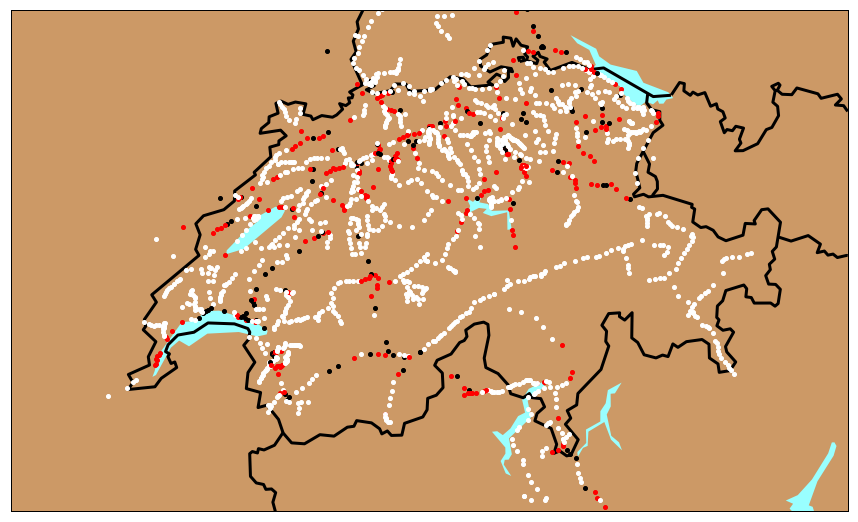

In [68]:
model, iters = sir_nw(CFF_Graph_Trains, ['Lausanne'], 200)
PlotCityStateTrains(iters,CFF_Graph_Trains)

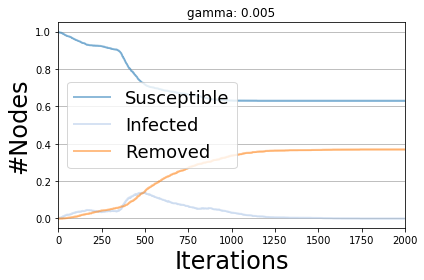

In [102]:
model, iters = sir_nw(CFF_Graph_Trains, ['Lausanne'], 2000)
# Simulation execution
trends = model.build_trends(iters)
# Visualization
viz = dt.DiffusionTrend(model, trends)
viz.plot()

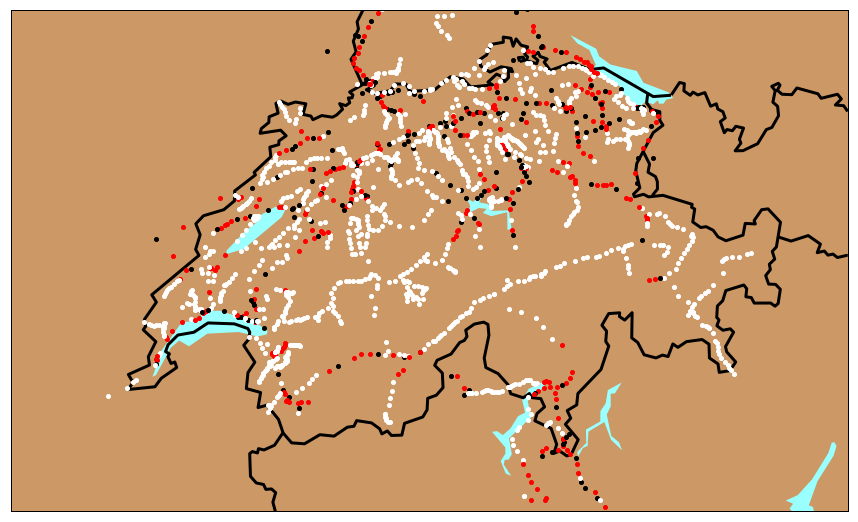

In [92]:
model, iters = sir_nw(CFF_Graph_Trains, ['Zürich HB'], 200)
PlotCityStateTrains(iters,CFF_Graph_Trains)

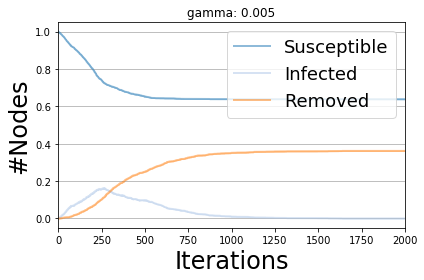

In [103]:
model, iters = sir_nw(CFF_Graph_Trains, ['Zürich HB'], 2000)
# Simulation execution
trends = model.build_trends(iters)
# Visualization
viz = dt.DiffusionTrend(model, trends)
viz.plot()

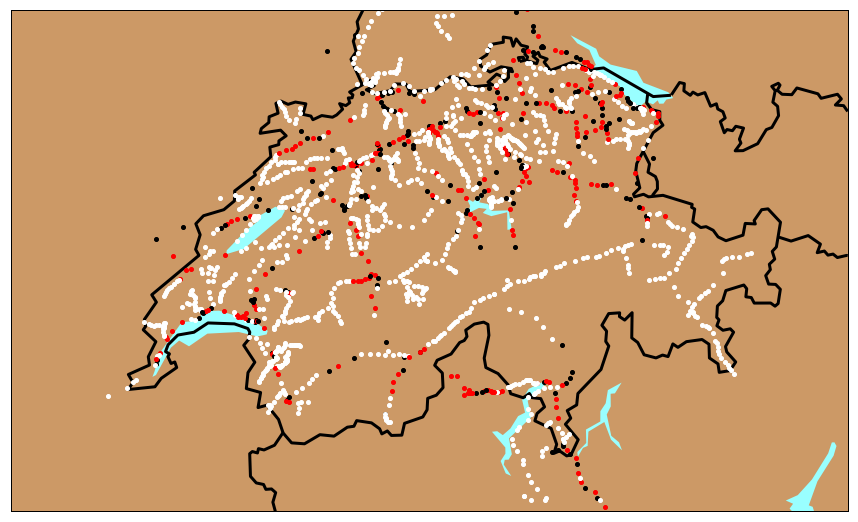

In [93]:
model, iters = sir_nw(CFF_Graph_Trains, ['Basel SBB'], 200)
PlotCityStateTrains(iters,CFF_Graph_Trains)

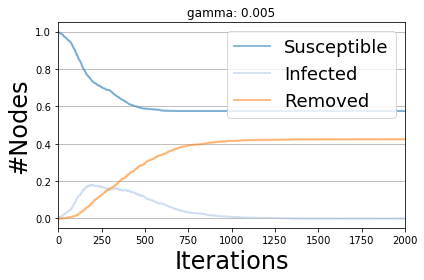

In [108]:
model, iters = sir_nw(CFF_Graph_Trains, ['Basel SBB'], 2000)
# Simulation execution
trends = model.build_trends(iters)
# Visualization
viz = dt.DiffusionTrend(model, trends)
viz.plot()

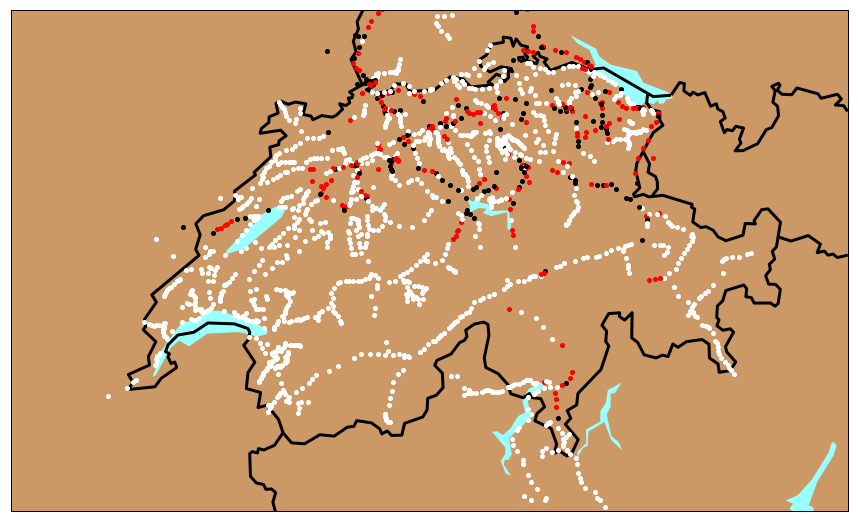

In [94]:
model, iters = sir_nw(CFF_Graph_Trains, ['Luzern'], 200)
PlotCityStateTrains(iters,CFF_Graph_Trains)

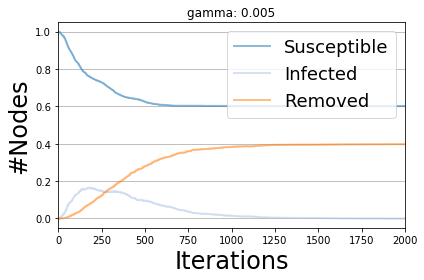

In [104]:
model, iters = sir_nw(CFF_Graph_Trains, ['Luzern'], 2000)
# Simulation execution
trends = model.build_trends(iters)
# Visualization
viz = dt.DiffusionTrend(model, trends)
viz.plot()

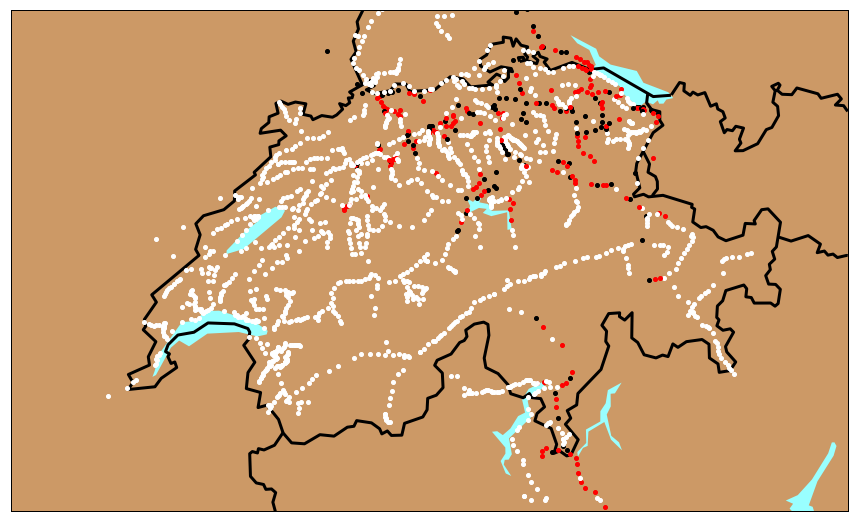

In [95]:
model, iters = sir_nw(CFF_Graph_Trains, ['St. Gallen'], 200)
PlotCityStateTrains(iters,CFF_Graph_Trains)

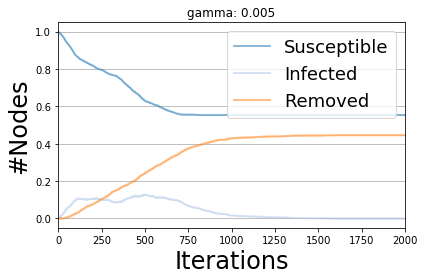

In [105]:
model, iters = sir_nw(CFF_Graph_Trains, ['St. Gallen'], 2000)
# Simulation execution
trends = model.build_trends(iters)
# Visualization
viz = dt.DiffusionTrend(model, trends)
viz.plot()

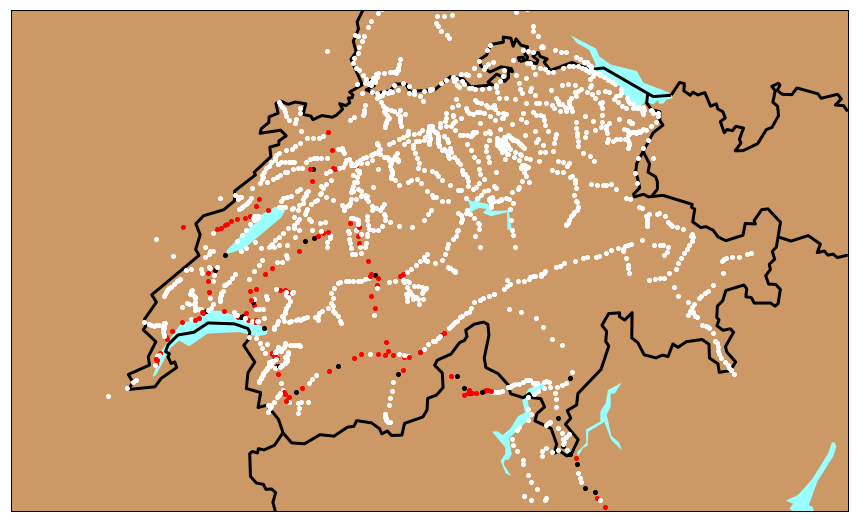

In [96]:
model, iters = sir_nw(CFF_Graph_Trains, ['Lugano'], 200)
PlotCityStateTrains(iters,CFF_Graph_Trains)

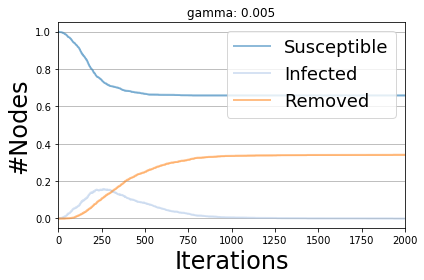

In [106]:
model, iters = sir_nw(CFF_Graph_Trains, ['Lugano'], 2000)
# Simulation execution
trends = model.build_trends(iters)
# Visualization
viz = dt.DiffusionTrend(model, trends)
viz.plot()

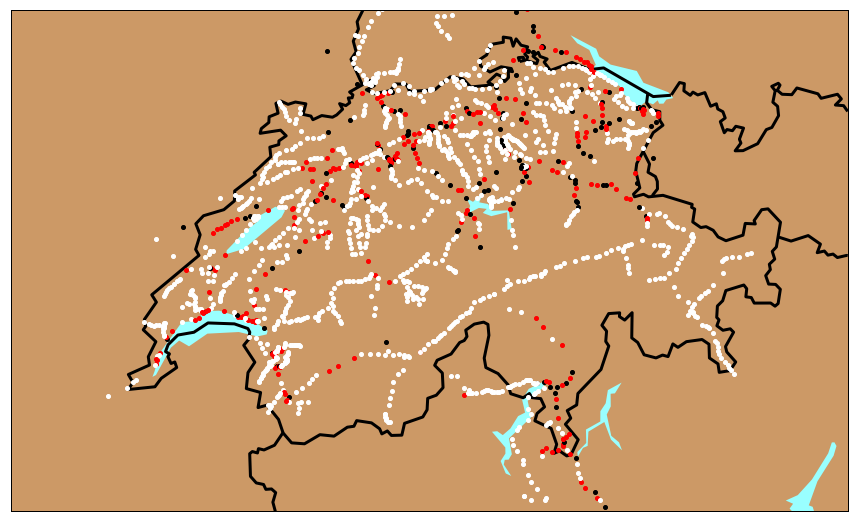

In [97]:
model, iters = sir_nw(CFF_Graph_Trains, ['Winterthur'], 200)
PlotCityStateTrains(iters,CFF_Graph_Trains)

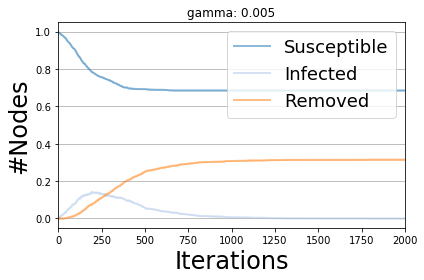

In [107]:
model, iters = sir_nw(CFF_Graph_Trains, ['Winterthur'], 2000)
# Simulation execution
trends = model.build_trends(iters)
# Visualization
viz = dt.DiffusionTrend(model, trends)
viz.plot()

In [100]:
for i in range(10):
    infected_node = sorted_pop[i]
    model, iters = sir_nw(CFF_Graph_Trains, [infected_node], 1000)
    print('The percentage of node infected or removed in the network after 1000 iterations starting from', infected_node,'is',round(100*(iters[-1]['node_count'][1]+iters[-1]['node_count'][2])/(iters[-1]['node_count'][0]+iters[-1]['node_count'][1]+iters[-1]['node_count'][2]),2),'%')
    print('The number of node still infected in the newtork after 1000 iterations starting from', infected_node,'is',iters[-1]['node_count'][1],'\n')

The percentage of node infected or removed in the network after 1000 iterations starting from Zürich HB is 50.18 %
The number of node still infected in the newtork after 1000 iterations starting from Zürich HB is 21 

The percentage of node infected or removed in the network after 1000 iterations starting from Zürich Flughafen is 44.05 %
The number of node still infected in the newtork after 1000 iterations starting from Zürich Flughafen is 23 

The percentage of node infected or removed in the network after 1000 iterations starting from Zürich Affoltern is 49.24 %
The number of node still infected in the newtork after 1000 iterations starting from Zürich Affoltern is 23 

The percentage of node infected or removed in the network after 1000 iterations starting from Zürich Leimbach is 0.36 %
The number of node still infected in the newtork after 1000 iterations starting from Zürich Leimbach is 0 

The percentage of node infected or removed in the network after 1000 iterations starting f

In [22]:
for j in range(10):
    infected_node = sorted_pop[j]
    List_perc = list()
    Numb_infected = list()

    for i in range(100):
        model, iters = sir_nw(CFF_Graph_Trains, [infected_node], 1000)
        List_perc.append(round(100*(iters[-1]['node_count'][1]+iters[-1]['node_count'][2])/(iters[-1]['node_count'][0]+iters[-1]['node_count'][1]+iters[-1]['node_count'][2]),2))
        Numb_infected.append(iters[-1]['node_count'][1])

    print('The average percentage of node infected or removed in the network after 1000 iterations starting from', infected_node,'is',np.mean(List_perc),'%')
    print('The average number of node still infected in the newtork after 1000 iterations starting from', infected_node,'is',np.mean(Numb_infected),'\n')

The average percentage of node infected or removed in the network after 1000 iterations starting from Zürich HB is 48.0203 %
The average number of node still infected in the newtork after 1000 iterations starting from Zürich HB is 21.39 

The average percentage of node infected or removed in the network after 1000 iterations starting from Zürich Flughafen is 48.0197 %
The average number of node still infected in the newtork after 1000 iterations starting from Zürich Flughafen is 22.62 

The average percentage of node infected or removed in the network after 1000 iterations starting from Zürich Affoltern is 47.1556 %
The average number of node still infected in the newtork after 1000 iterations starting from Zürich Affoltern is 22.3 

The average percentage of node infected or removed in the network after 1000 iterations starting from Zürich Leimbach is 40.1174 %
The average number of node still infected in the newtork after 1000 iterations starting from Zürich Leimbach is 20.5 

The av

In [101]:
infected_node = 'Zürich HB'
model, iters = sir_nw(CFF_Graph_Trains, [infected_node], 10000)
print('The percentage of node infected or removed in the network after 10000 iterations starting from', infected_node,'is',round(100*(iters[-1]['node_count'][1]+iters[-1]['node_count'][2])/(iters[-1]['node_count'][0]+iters[-1]['node_count'][1]+iters[-1]['node_count'][2]),2),'%')
print('The number of node still infected in the newtork after 10000 iterations starting from', infected_node,'is',iters[-1]['node_count'][1],'\n')

The percentage of node infected or removed in the network after 10000 iterations starting from Zürich HB is 43.24 %
The number of node still infected in the newtork after 10000 iterations starting from Zürich HB is 0 



The infection seems to die after 10 000 iterations even with Zürich initially infected. And only 43% of Switzerland is infected.

<a id='Results'></a>
## Results and interpretation

ToDo 

<a id='Discussion'></a>
## Discussion

### Trains? Busses? Both?

For this project it was possible to either consider Train data, Bus data, or both. In the midterm that Clément did before this project, he only focussed on train data. In the train data set there are around ~2200 nodes and ~2500 edges. Upon further inspection we find the network ressembles a tree, which makes it a bit less interesting for advanced analysis. Mainly for this reason we decided to also include the bus stops & routes for the final project, briging the total number of nodes up to ~18'000 nodes, and around ~22'000 edges. The bus routes do in fact increase the average degree a little, especially around the main train station, but the rest of the routes are purely linear aswell, thus overall the difference is not extremely exciting.

Our objective for this project was to observe how an infection spreads throughout the country of Switzerland, and we considered the spread at the neighbourhood (intra city) level to be not so relevant. Therefore we removed all bus lines that start and end within a given radius of a large city. In hindsight this proved a very costly process, and was not very beneficial at all to the final results.

### Link between bus and trains?

TO DISCUSS. Is there a link between bus lines and train lines?

### Limitation of model. Probability on a line and not on neighbors? 

It is possible that a person infected does not exit the train or bus on a station (stop not infected) but infect the next stop. But in our modified SIR model, the probability of infection is just based on the neighbors and not on all the line. 

### A spatial infection or a dynamic infection?

We chose to use an adapted SIR Model. In our version of the SIR Model, each node has a probability to get infected with respect to its population if one of the neighbors is infected. This means that the epidemic can quite simply die out in an early iteration, even though in the real world a person is likely to stay on the transport network for atleast a few stops.

### Edge weights

When constructing the graph, we append a trip ID to an edge if the edge already existed in the graph. We have no further concept of edge weight. We could have used the number of times this edge is added as an edge weight, and then scale the probability of the epidemic spreading to another node by the edge weight to that node.

<a id='Conclusion'></a>
## Conclusion

ToDo

<a id='Appendices'></a>
## Appendices

### Project structure

ToDo